## **GLOBAL SUPERSTORE DATA ANALYSIS**

Customer segmentation is the process of dividing a customer base into groups of individuals that are similar in certain ways relevant to marketing, such as age, gender, interests, and spending habits. It enables companies to target specific groups with tailored promotions, products, or services that are most likely to resonate with them. Machine learning has become a popular tool for automating the process of customer segmentation, providing a more efficient and effective way to identify patterns and relationships within customer data. In this project, customer segmentation is going to perform on data with the use Machine Learning. This data is from a global superstore data. Customers will be segemented into various groups based on their behaviours and purchasing power. This project is relevant in today's world because it aids in customer segmentation using machine learning and deriving marketing strategies which leads to increase customer satisfaction.

> Add blockquote



** **

## **Context**

Today, many businesses are going online and therefore online marketing is essential to retain customers. However, treating customers equally and targeting them with generic marketing strategies can be ineffective and even alienating. This is where customer segmentation comes into play as a powerful solution.  The goal of customer segmentation is to divide the company’s customers based on their demographic characteristics (age, gender, marital status) and their behavior characteristics (types of products ordered, annual income). Considering the nature of the data, focusing on the behavioral characteristics of the customers in customer segmentation process is the best approach.


In this project we aim to use the following algorithms:

**Clustering algorithms**: This K-Means algorithm will be used to find the k number of clusters in a dataset. This will help us to divide customers into groups based on their characteristics and behaviour.


**Association rule learning**: This method finds the relationships between customer attributes and behaviours, such as buying habits and product preferences. Association rule learning can help companies understand which products are frequently purchased together and target customers accordingly.

** **

**Advantages of Machine Learning for Customer Segmentation**

One of the key benefits of using machine learning for customer segmentation is its ability to process vast amounts of data in real time. This allows companies to quickly identify new trends and patterns in customer behaviour, allowing them to make more informed marketing decisions. Additionally, machine learning algorithms can continuously learn and improve over time, providing a more accurate picture of customer behaviour. Another advantage of using machine learning for customer segmentation is that it eliminates the need for manual data analysis. This can be a time-consuming and error-prone process, particularly when working with large datasets. Machine learning algorithms can automate the process of data analysis, providing companies with more accurate and reliable results.

## **Problem Statement**

In today's competitive retail landscape, understanding and effectively catering to customer needs are paramount for sustained business growth. The challenge lies in deciphering the diverse purchasing behaviors and preferences of customers within a global superstore dataset. Thus, the problem at hand is:

How can we leverage data analytics to segment customers based on their purchasing behavior within a global superstore dataset, with the aim of optimizing marketing strategies and enhancing customer retention?

This problem statement encapsulates the core challenge of the project identifying distinct customer segments within the dataset to tailor marketing strategies and foster long-term customer relationships.

## **Project Objectives**

1. Identify Distinct Customer Segments

2. Optimize Marketing Strategies

3. Enhance Customer Retention


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
glo_store= pd.read_csv("/content/drive/MyDrive/Capstone/Global_Superstore.csv", index_col = 0)

**Data Understanding**



In [ ]:
# Printing the first 5 rows
glo_store.head()

,Order_ID,Category,City,Country,Customer_Name,Market,Customer_ID,Order_Date,Ship_Date,Order_Priority,...,Region,Segment,Ship_Mode,State,Sub_Category,Discount,Profit,Quantity,Sales,Shipping_Cost
Global_Orders_ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2013-158568,Technology,Chicago,United States,Rick Bensley,USCA,RB-194654,2020-08-28,2020-09-01,Medium,...,Central,Home Office,Standard Class,Illinois,Accessories,0.2,-10.7973,3,95.976,10.01
2,CA-2013-158568,Office Supplies,Chicago,United States,Rick Bensley,USCA,RB-194654,2020-08-28,2020-09-01,Medium,...,Central,Home Office,Standard Class,Illinois,Binders,0.8,-3.0396,3,1.788,0.19
3,CA-2013-161207,Office Supplies,Concord,United States,Adam Bellavance,USCA,AB-100604,2020-08-28,2020-09-02,Medium,...,East,Home Office,Standard Class,New Hampshire,Supplies,0.0,8.0997,3,27.930,2.16
4,CA-2013-128727,Technology,New York City,United States,Meg O'Connel,USCA,MO-178004,2020-08-28,2020-09-03,Medium,...,East,Home Office,Standard Class,New York,Phones,0.0,5.5000,4,22.000,1.28
5,CA-2013-159912,Furniture,Philadelphia,United States,George Bell,USCA,GB-145304,2020-08-28,2020-09-02,Medium,...,East,Corporate,Standard Class,Pennsylvania,Tables,0.4,-56.4480,4,241.920,22.28


In [ ]:
glo_store.shape

(51290, 22)

In [ ]:
for col in glo_store.columns:
    print(col)

Order_ID
Category
City
Country
Customer_Name
Market
Customer_ID
Order_Date
Ship_Date
Order_Priority
Product_ID
Product_Name
Region
Segment
Ship_Mode
State
Sub_Category
Discount
Profit
Quantity
Sales
Shipping_Cost


In [ ]:
glo_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, 1 to 51290
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        51290 non-null  object 
 1   Category        51290 non-null  object 
 2   City            51290 non-null  object 
 3   Country         51290 non-null  object 
 4   Customer_Name   51290 non-null  object 
 5   Market          51290 non-null  object 
 6   Customer_ID     51290 non-null  object 
 7   Order_Date      51290 non-null  object 
 8   Ship_Date       51290 non-null  object 
 9   Order_Priority  51290 non-null  object 
 10  Product_ID      51290 non-null  object 
 11  Product_Name    51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Segment         51290 non-null  object 
 14  Ship_Mode       51290 non-null  object 
 15  State           51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Discount        51290 non-null  floa

Changing the order and shape dates and global orders ID datatypes

In [ ]:
glo_store['Ship_Date'] = pd.to_datetime(glo_store['Ship_Date'],format ='mixed')
glo_store['Order_Date'] = pd.to_datetime(glo_store['Order_Date'],format ='mixed')

In [ ]:
glo_store.dtypes

Order_ID                  object
Category                  object
City                      object
Country                   object
Customer_Name             object
Market                    object
Customer_ID               object
Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Order_Priority            object
Product_ID                object
Product_Name              object
Region                    object
Segment                   object
Ship_Mode                 object
State                     object
Sub_Category              object
Discount                 float64
Profit                   float64
Quantity                   int64
Sales                    float64
Shipping_Cost            float64
dtype: object

**Checking for missing values**

In [ ]:
glo_store.isnull().sum()

Order_ID          0
Category          0
City              0
Country           0
Customer_Name     0
Market            0
Customer_ID       0
Order_Date        0
Ship_Date         0
Order_Priority    0
Product_ID        0
Product_Name      0
Region            0
Segment           0
Ship_Mode         0
State             0
Sub_Category      0
Discount          0
Profit            0
Quantity          0
Sales             0
Shipping_Cost     0
dtype: int64

In [ ]:
glo_store.duplicated().sum()

0

In [ ]:
glo_store.nunique()

Order_ID          25035
Category              3
City               3636
Country             147
Customer_Name       795
Market                4
Customer_ID        4873
Order_Date         1429
Ship_Date          1463
Order_Priority        4
Product_ID        10292
Product_Name       3788
Region               13
Segment               3
Ship_Mode             4
State              1086
Sub_Category         17
Discount             27
Profit            24575
Quantity             14
Sales             22995
Shipping_Cost     16877
dtype: int64

**Describing the categorical and numerical values**

In [ ]:
glo_store.describe(include ='object').T

,count,unique,top,freq
Order_ID,51290,25035,CA-2014-100111,14
Category,51290,3,Office Supplies,31273
City,51290,3636,New York City,915
Country,51290,147,United States,9994
Customer_Name,51290,795,Muhammed Yedwab,108
Market,51290,4,EMEA,19616
Customer_ID,51290,4873,JG-158051,40
Order_Priority,51290,4,Medium,29433
Product_ID,51290,10292,OFF-AR-10003651,35
Product_Name,51290,3788,Staples,227


In [ ]:
glo_store.describe(include = np.number)

,Discount,Profit,Quantity,Sales,Shipping_Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.490581,26.375818
std,0.212280,174.340972,2.278766,487.565361,57.296810
min,0.000000,-6599.978000,1.000000,0.444000,0.002000
25%,0.000000,0.000000,2.000000,30.758625,2.610000
50%,0.000000,9.240000,3.000000,85.053000,7.790000
75%,0.200000,36.810000,5.000000,251.053200,24.450000
max,0.850000,8399.976000,14.000000,22638.480000,933.570000


**Describing the datetime variables**

In [ ]:
datetime_vars = ['Order_Date', 'Ship_Date']
glo_store[datetime_vars].describe()

,Order_Date,Ship_Date
count,51290,51290
mean,2020-05-10 01:43:34.263988992,2020-05-14 00:59:00.900760320
min,2017-12-30 00:00:00,2018-01-01 00:00:00
25%,2019-06-18 00:00:00,2019-06-22 00:00:00
50%,2020-07-06 00:00:00,2020-07-10 00:00:00
75%,2021-05-20 00:00:00,2021-05-24 00:00:00
max,2021-12-29 00:00:00,2022-01-05 00:00:00


### **Data Understanding Summary**

**Data Shape**: The data has 51290 rows and 22 columns.

**Missing Values**: There are no missing values.

**Duplicates** There are no duplicates.


## **Data Cleaning**

**Renaming columns**

In [ ]:
glo_store.rename(columns = {"Sales" : "Sales($)",
                        "Profit" : "Profit($)",
                         "Shipping_Cost" : "Shipping_Cost($)",
                         "Discount" : "Discount($)",
                          },inplace = True)

In [ ]:
glo_store.head(1)

,Order_ID,Category,City,Country,Customer_Name,Market,Customer_ID,Order_Date,Ship_Date,Order_Priority,...,Region,Segment,Ship_Mode,State,Sub_Category,Discount($),Profit($),Quantity,Sales($),Shipping_Cost($)
Global_Orders_ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2013-158568,Technology,Chicago,United States,Rick Bensley,USCA,RB-194654,2020-08-28,2020-09-01,Medium,...,Central,Home Office,Standard Class,Illinois,Accessories,0.2,-10.7973,3,95.976,10.01


**Creating a column for loss**

In [ ]:
glo_store['Loss($)'] = 0
glo_store.loc[glo_store['Profit($)'] < 0, 'Loss($)'] = glo_store.loc[glo_store['Profit($)'] < 0, 'Profit($)']
print(glo_store[['Order_ID', 'Profit($)', 'Loss($)']])

                        Order_ID  Profit($)  Loss($)
Global_Orders_ID                                    
1                 CA-2013-158568   -10.7973 -10.7973
2                 CA-2013-158568    -3.0396  -3.0396
3                 CA-2013-161207     8.0997   0.0000
4                 CA-2013-128727     5.5000   0.0000
5                 CA-2013-159912   -56.4480 -56.4480
...                          ...        ...      ...
51286              IN-2011-15053    14.3100   0.0000
51287              IN-2011-15053     9.0000   0.0000
51288              ID-2011-84738   -26.1240 -26.1240
51289              ID-2011-84738   -11.7480 -11.7480
51290              IN-2011-84549    12.9600   0.0000

[51290 rows x 3 columns]


**Creating a column for Interval Days**

In [ ]:
glo_store['Interval_days'] = (glo_store['Ship_Date'] - glo_store['Order_Date']).dt.days

**Creating a column for Months**

In [ ]:
glo_store['Month'] = glo_store['Order_Date'].dt.strftime('%B')

**Creating a column for Year**

In [ ]:
glo_store['Year'] = glo_store['Order_Date'].dt.year


**Creating a column for Unit Price**

In [ ]:
glo_store['Unit Price($)'] = glo_store['Sales($)']/glo_store['Quantity']


**Creating a column for Day**

In [ ]:
glo_store['Day'] = glo_store['Order_Date'].dt.date

**Creating a Profit Column for Profit Only**

In [ ]:
glo_store['Profit_($)'] = 0
glo_store.loc[glo_store['Profit($)'] >= 0, 'Profit_($)'] = glo_store.loc[glo_store['Profit($)'] >= 0, 'Profit($)']
print(glo_store[['Order_ID', 'Profit($)', 'Profit_($)']])

                        Order_ID  Profit($)  Profit_($)
Global_Orders_ID                                       
1                 CA-2013-158568   -10.7973      0.0000
2                 CA-2013-158568    -3.0396      0.0000
3                 CA-2013-161207     8.0997      8.0997
4                 CA-2013-128727     5.5000      5.5000
5                 CA-2013-159912   -56.4480      0.0000
...                          ...        ...         ...
51286              IN-2011-15053    14.3100     14.3100
51287              IN-2011-15053     9.0000      9.0000
51288              ID-2011-84738   -26.1240      0.0000
51289              ID-2011-84738   -11.7480      0.0000
51290              IN-2011-84549    12.9600     12.9600

[51290 rows x 3 columns]


In [ ]:
glo_store['Year'] = glo_store['Year'].astype(str)

**Creating a copy of glo_store**

In [ ]:
glo_store1= glo_store.copy()


**Dividing the Sales by 1000000**

In [ ]:
glo_store1['Sales($)'] = glo_store1['Sales($)']/1000000

**Dividing the Profit by 1000000**

In [ ]:
glo_store1['Profit($)'] = glo_store1['Profit($)']/1000000

**Dividing the Profit Only by 1000000**

In [ ]:
glo_store1['Profit_($)'] = glo_store1['Profit_($)']/1000000

**Dividing the Loss by 1000000**

In [ ]:
glo_store1['Loss($)'] = glo_store1['Loss($)']/1000000

In [ ]:
glo_store.head(1)

,Order_ID,Category,City,Country,Customer_Name,Market,Customer_ID,Order_Date,Ship_Date,Order_Priority,...,Quantity,Sales($),Shipping_Cost($),Loss($),Interval_days,Month,Year,Unit Price($),Day,Profit_($)
Global_Orders_ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2013-158568,Technology,Chicago,United States,Rick Bensley,USCA,RB-194654,2020-08-28,2020-09-01,Medium,...,3,95.976,10.01,-10.7973,4,August,2020,31.992,2020-08-28,0.0


### **Data Cleaning Summary**

In [ ]:
glo_store["Country"].unique()

array(['United States', 'Kenya', 'Algeria', 'Ukraine', 'Egypt', 'Germany',
       'France', 'Italy', 'Malaysia', 'Indonesia', 'Nigeria', 'Turkey',
       'Mexico', 'Iran', 'Chile', 'Peru', 'Brazil', 'United Kingdom',
       'Spain', 'Thailand', 'Vietnam', 'Australia', 'Singapore', 'India',
       'Bangladesh', 'China', 'New Zealand', 'Canada', 'Hungary',
       'Democratic Republic of the Congo', 'Argentina', 'Guatemala',
       'Cuba', 'Netherlands', 'Philippines', 'South Korea', 'Austria',
       'Russia', 'Rwanda', 'Haiti', 'Dominican Republic', 'Panama',
       'El Salvador', 'Sudan', 'Saudi Arabia', 'Kazakhstan', 'Ghana',
       'Pakistan', 'Afghanistan', 'Myanmar (Burma)', 'Zimbabwe',
       'Cambodia', 'Georgia', 'Poland', 'Iraq', 'Colombia', 'Nicaragua',
       'Nepal', 'Yemen', 'Denmark', 'Croatia', 'Morocco', 'South Africa',
       'Honduras', 'Martinique', 'Angola', 'Venezuela',
       'Papua New Guinea', 'Lithuania', 'Bolivia', 'Zambia', 'Madagascar',
       'Ecuador', "Cot

In [ ]:
glo_store["Country"].nunique()

147

In [ ]:
glo_store["Category"].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

In [ ]:
glo_store["Sub_Category"].unique()

array(['Accessories', 'Binders', 'Supplies', 'Phones', 'Tables',
       'Bookcases', 'Fasteners', 'Labels', 'Storage', 'Art', 'Envelopes',
       'Paper', 'Chairs', 'Machines', 'Copiers', 'Appliances',
       'Furnishings'], dtype=object)

In [ ]:
countries = glo_store['Country'].value_counts(normalize=True)
countries[:10]

Country
United States     0.194853
Australia         0.055313
France            0.055118
Mexico            0.051550
Germany           0.040261
China             0.036654
United Kingdom    0.031839
Brazil            0.031176
India             0.030318
Indonesia         0.027101
Name: proportion, dtype: float64

In [ ]:
segment_counts = glo_store['Segment'].value_counts()
total_counts = segment_counts.sum()

segment_percentages = (segment_counts / total_counts) * 100
print(segment_percentages)

Segment
Consumer       51.702086
Corporate      30.081887
Home Office    18.216027
Name: count, dtype: float64


Approx 52% of segments for product sales was Consumers

## **Exploratory Data Analysis**


**Univariate Analysis**

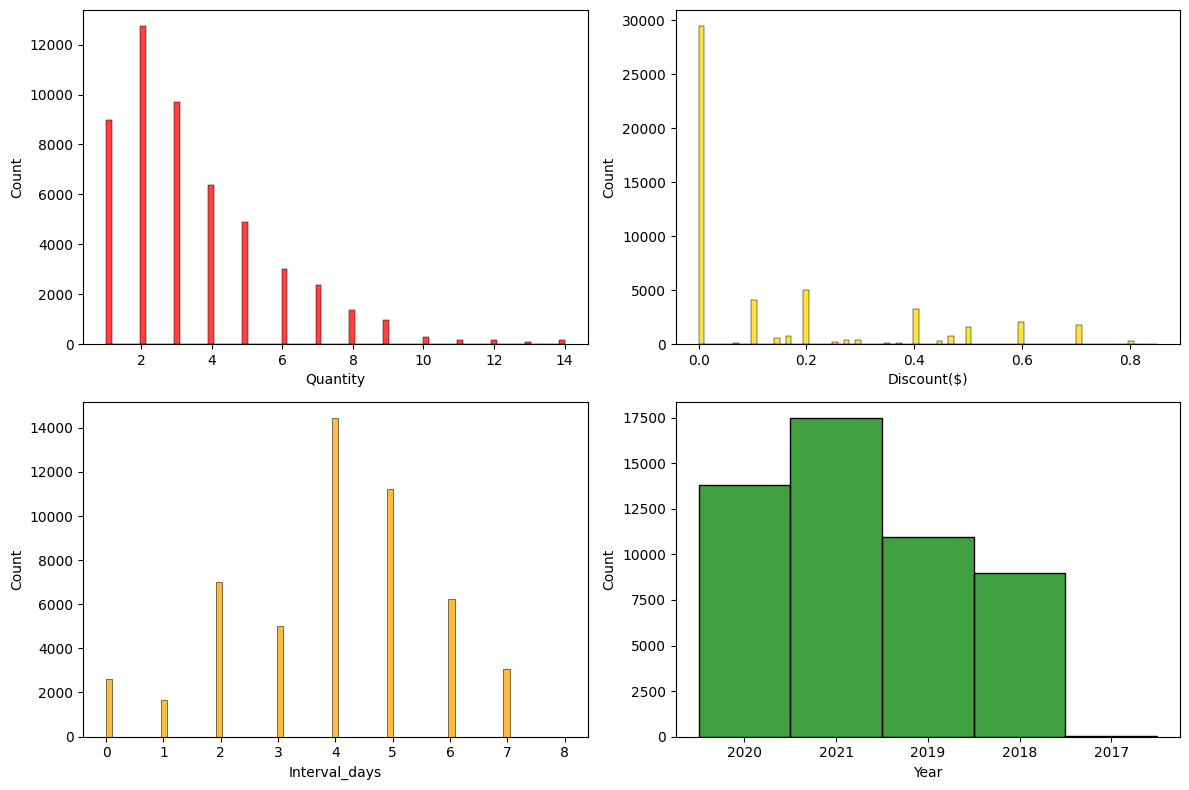

In [ ]:
# Numerical Variables
# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(data=glo_store1, x="Quantity", ax=axes[0,0], color="r")
sns.histplot(data=glo_store1, x="Discount($)", ax=axes[0,1], color="gold")
sns.histplot(data= glo_store1, x="Interval_days", ax=axes[1,0], color="orange")
sns.histplot(data= glo_store1, x="Year", ax=axes[1,1], color="green")

# Remove the last plot
#fig.delaxes(axes[1,1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Most of the products were delivered within 4 days.\
Most of the sales were made in 2021

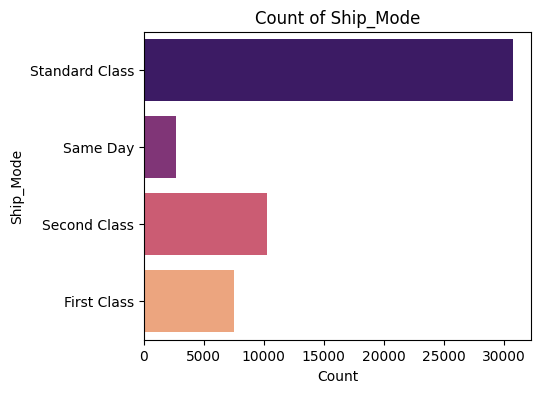

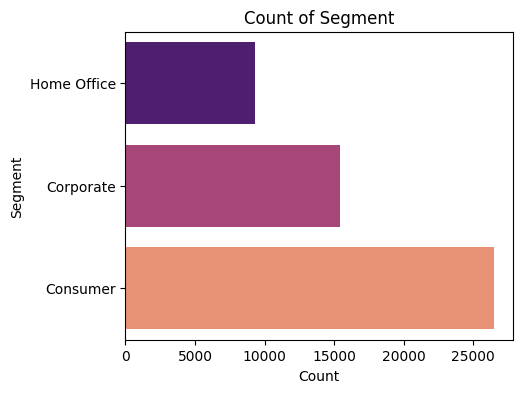

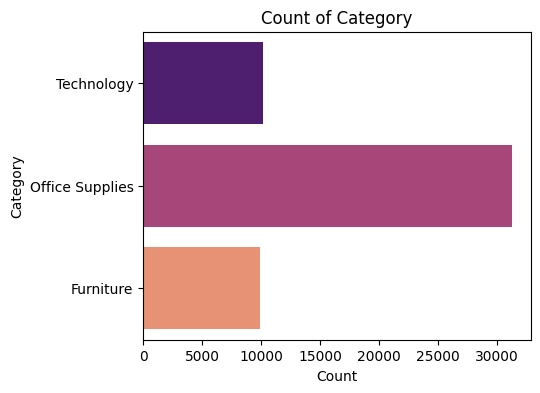

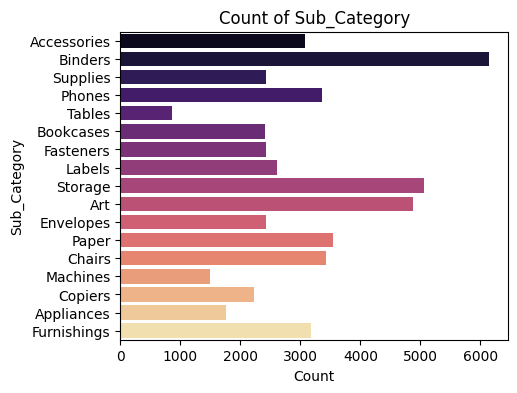

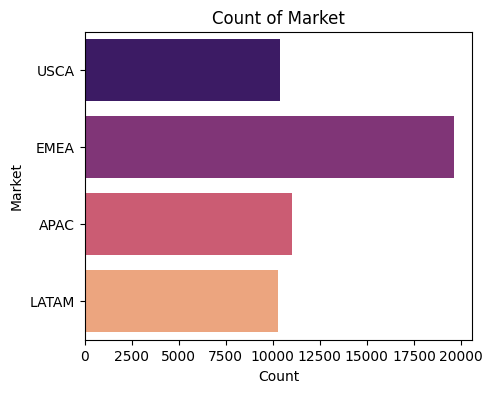

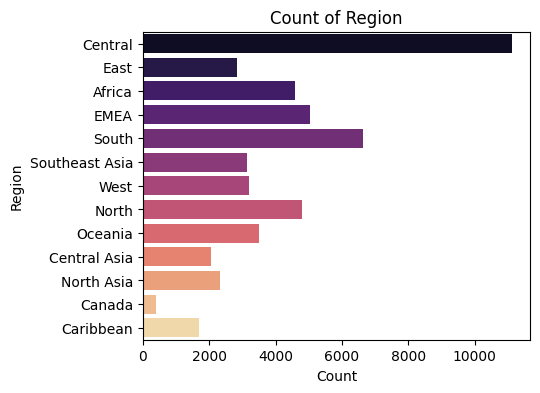

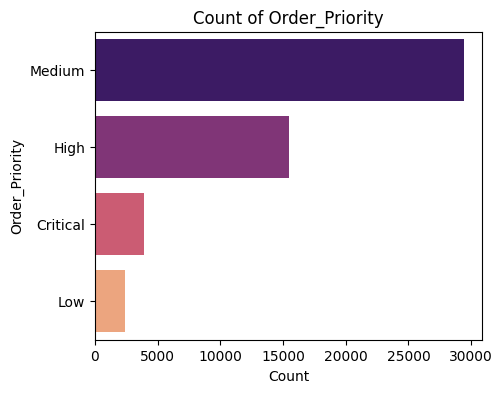

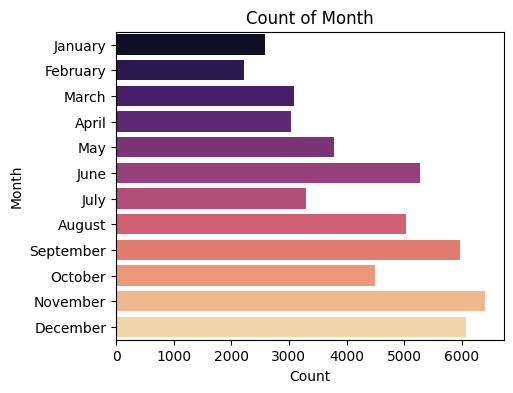

In [ ]:
# Categorical Variables
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
glo_store1['Month'] = pd.Categorical(glo_store['Month'], categories=month_order, ordered=True)

categorical = ['Ship_Mode', 'Segment', 'Category', 'Sub_Category', 'Market', 'Region', 'Order_Priority', 'Month']
for var in categorical:
    plt.figure(figsize=(5, 4))
    if var == 'Month':
        sns.countplot(data=glo_store1, y=var, order=month_order, palette='magma')

    else:
        sns.countplot(data=glo_store1, y=var, palette='magma')
    plt.title(f'Count of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()

Most of the shipments were made by Standard Class while the least wwere made by same day.\
Most of the sales made were from the consumer segment.\
Office supplies were the most bought product category.\
Most of the sales made were from the EMEA market.\
The Central region recorded the most sales while Canada recorded the least sales.\
Most orders were medium priority, while less orders were low priority.\
November recorded the highest number of sales while February recorded the least sales.



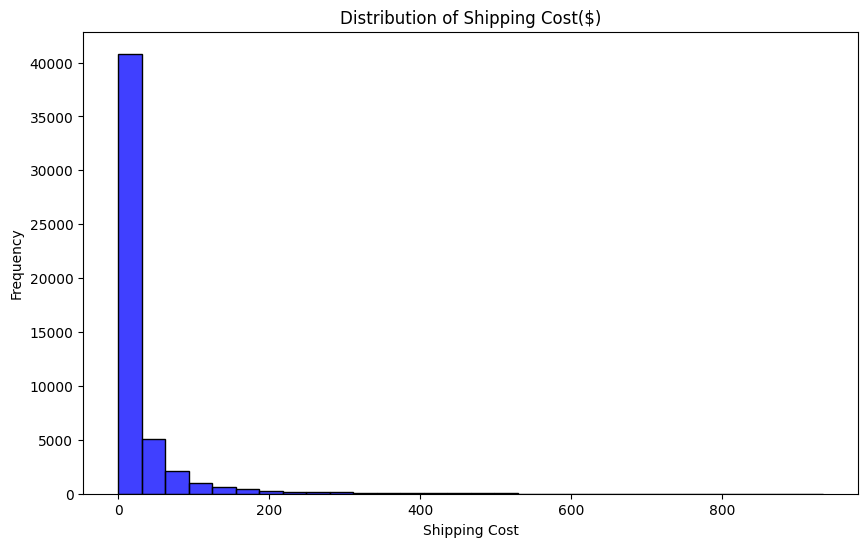

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(glo_store1['Shipping_Cost($)'], bins=30, color='blue')
plt.title('Distribution of Shipping Cost($)')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()

Most of the shipping cost were below $200.

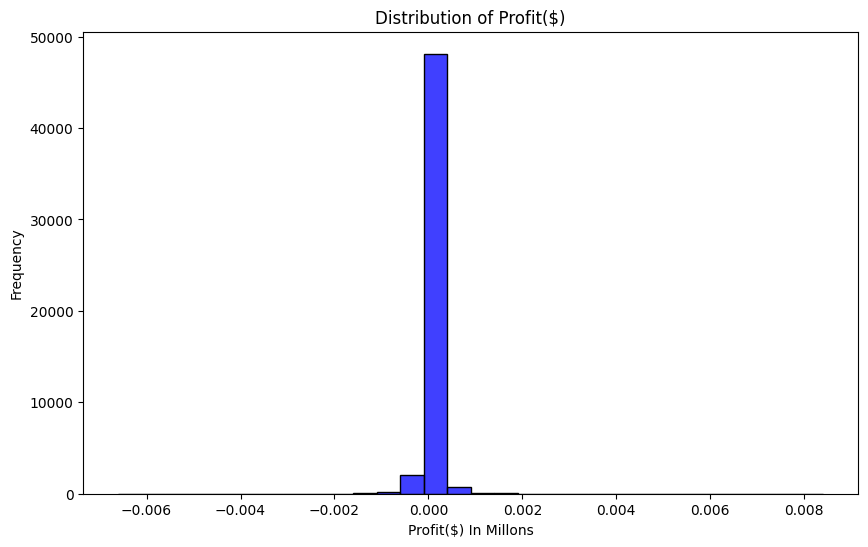

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(glo_store1['Profit($)'], bins=30, color='blue')
plt.title('Distribution of Profit($)')
plt.xlabel('Profit($) In Millons')
plt.ylabel('Frequency')
plt.show()

Profits recorded were less than $1 million.

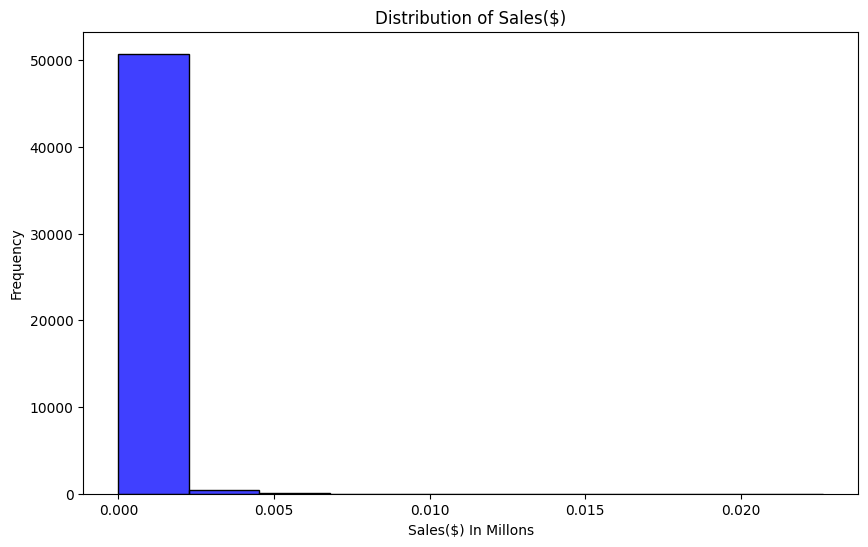

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(glo_store1['Sales($)'], bins=10, color='blue')
plt.title('Distribution of Sales($)')
plt.xlabel('Sales($) In Millons')
plt.ylabel('Frequency')
plt.show()

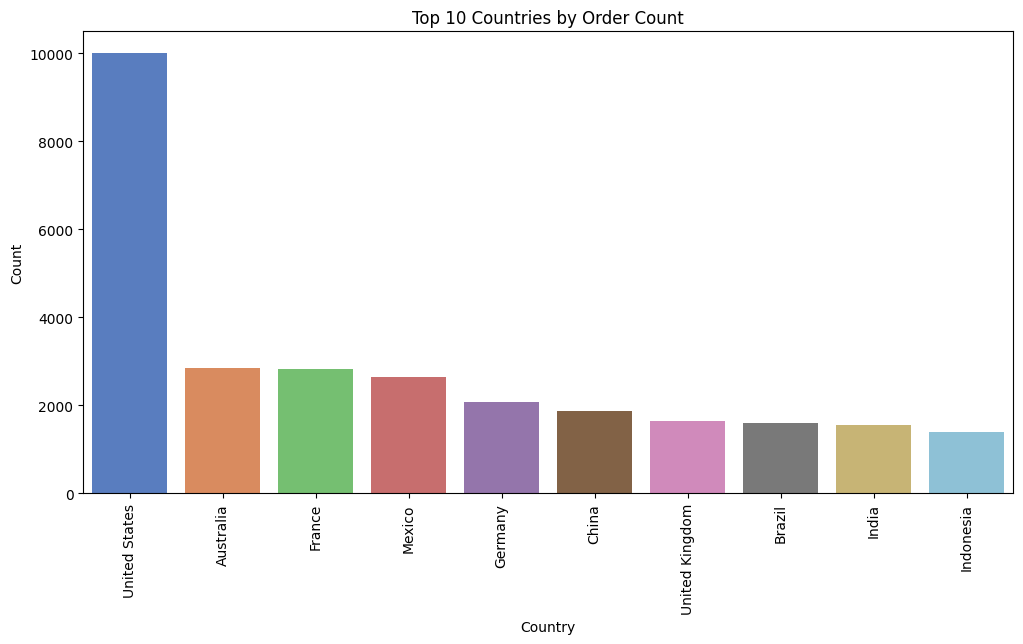

In [ ]:
# Plot countplot for Country
plt.figure(figsize=(12, 6))
sns.countplot(data=glo_store1, x='Country', palette='muted', order=glo_store['Country'].value_counts().index[:10])
plt.title('Top 10 Countries by Order Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

United States was the country with the most orders

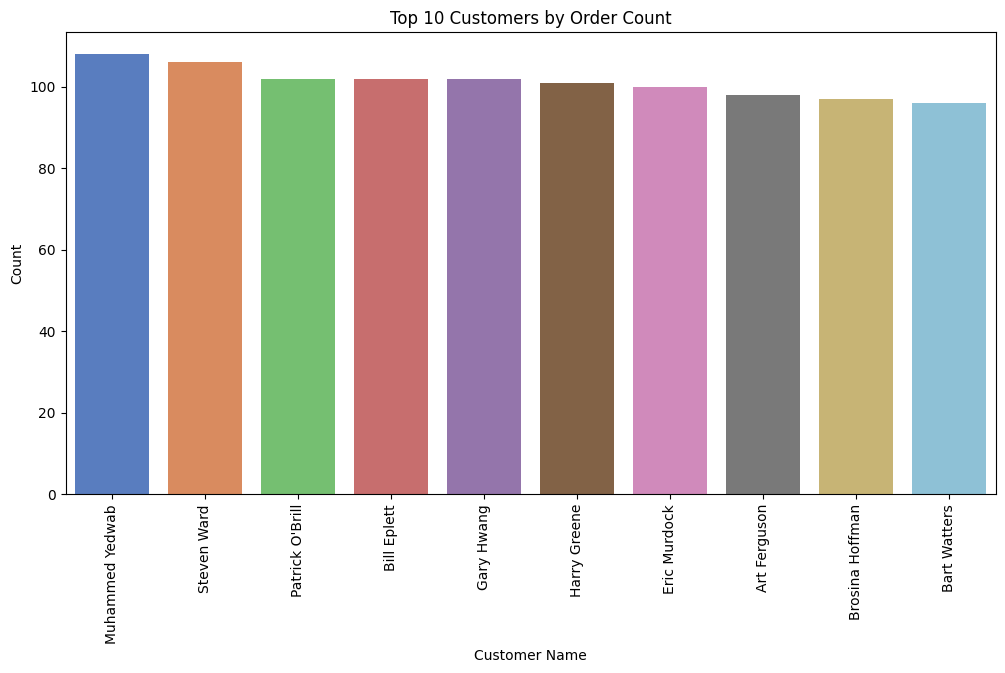

In [ ]:
# Plot countplot for Customer_Name
plt.figure(figsize=(12, 6))
sns.countplot(data=glo_store1, x='Customer_Name', palette='muted', order=glo_store['Customer_Name'].value_counts().index[:10])
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Customer Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Muhammed Yedwab was the customer with the most orders.

**Bivariate Analysis**

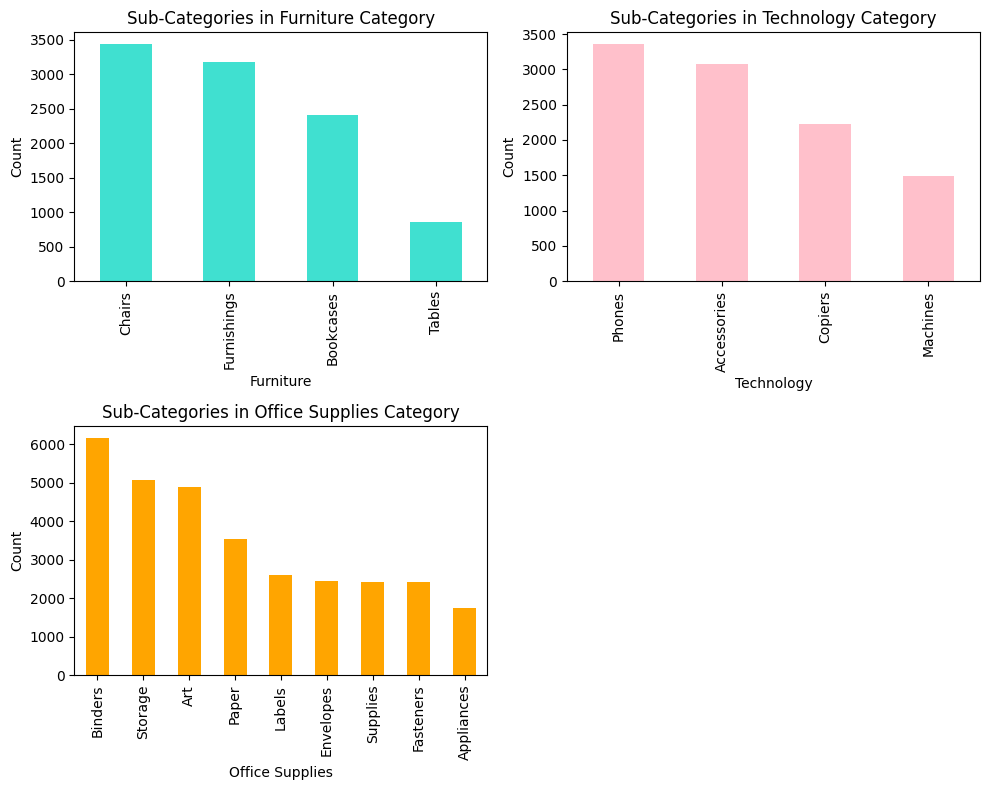

In [ ]:
# Creating a bar plot for the Sub_Category in each Category
plt.figure(figsize=(10, 8))

# Plot countplot for Sub_Category in Furniture Category
cat_count1 = glo_store1[glo_store1['Category']== 'Furniture']['Sub_Category'].value_counts()
# Convert the Series to a DataFrame
cat_count1 = cat_count1.reset_index()
# Rename the columns for clarity and setting Sub_Category as an index
cat_count1.columns = ['Sub_Category', 'Count']
cat_count1 = cat_count1.set_index('Sub_Category')
plt1= plt.subplot(2, 2, 1)
cat_count1.plot(kind='bar',  color = 'turquoise', legend = False, ax= plt1)
plt.title('Sub-Categories in Furniture Category')
plt.xlabel('Furniture')
plt.ylabel('Count')

# Plot countplot for Sub_Category in Technologhy Category
cat_count2 = glo_store1[glo_store1['Category']== 'Technology']['Sub_Category'].value_counts()
# Convert the Series to a DataFrame
cat_count2 = cat_count2.reset_index()
# Rename the columns for clarity and setting Sub_Category as an index
cat_count2.columns = ['Technology', 'Count']
cat_count2 = cat_count2.set_index('Technology')
plt2 = plt.subplot(2, 2, 2)
cat_count2.plot(kind='bar', color = 'pink', legend = False, ax = plt2)
plt.title('Sub-Categories in Technology Category')
plt.xlabel('Technology')
plt.ylabel('Count')

# Plot countplot for Sub_Category in Office Supplies Category
cat_count3 = glo_store1[glo_store1['Category']== 'Office Supplies']['Sub_Category'].value_counts()
# Convert the Series to a DataFrame
cat_count3 = cat_count3.reset_index()
# Rename the columns for clarity and setting Sub_Category as an index
cat_count3.columns = ['Office Supplies', 'Count']
cat_count3 = cat_count3.set_index('Office Supplies')
plt3= plt.subplot(2, 2, 3)
cat_count3.plot(kind='bar', color = 'orange', legend = False, ax = plt3)
plt.title('Sub-Categories in Office Supplies Category')
plt.xlabel('Office Supplies')
plt.ylabel('Count')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.5, hspace=1)

plt.tight_layout()
plt.show()

Chairs, phones and binders are the sub-categories with the most orders

In [ ]:
category_income = glo_store1.pivot_table(index = ['Market'],
                       columns ='Category',
                       values = ['Sales($)','Profit_($)','Loss($)'],
                      aggfunc = 'sum')
category_order = glo_store1.pivot_table(index = ['Market'],
                       columns ='Category',
                       values = ['Order_ID'],
                      aggfunc = 'count')

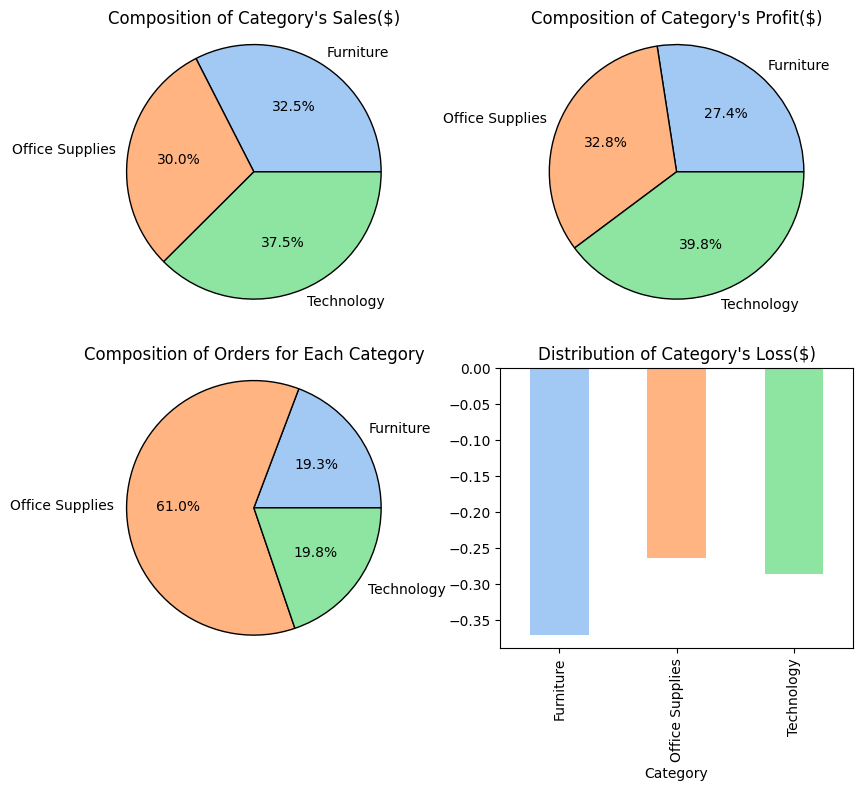

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creating pie charts to see the composition of Category in terms of Sales, Profit and Orders
plt.figure(figsize=(10, 8))

# Composition of Category Sales
plt.subplot(2, 2, 1)
sales_pie = category_income['Sales($)'].sum()
sales_pie.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title("Composition of Category's Sales($)")

# Composition of Category Profit
plt.subplot(2, 2, 2)
profit_pie = category_income['Profit_($)'].sum()
profit_pie.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title("Composition of Category's Profit($)")

# Composition of Category Orders
plt.subplot(2, 2, 3)
cat_order = category_order['Order_ID'].sum()
cat_order.plot(kind = 'pie',autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Composition of Orders for Each Category')

# Distribution of Category Loss
plt.subplot(2, 2, 4)
loss_bar = category_income['Loss($)'].sum()
loss_bar.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title("Distribution of Category's Loss($)")
plt.show()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.5, hspace=1)

plt.tight_layout()
plt.show()

Technology recorded the highest percentage of sales and profits.\
Office Supplies had the most orders

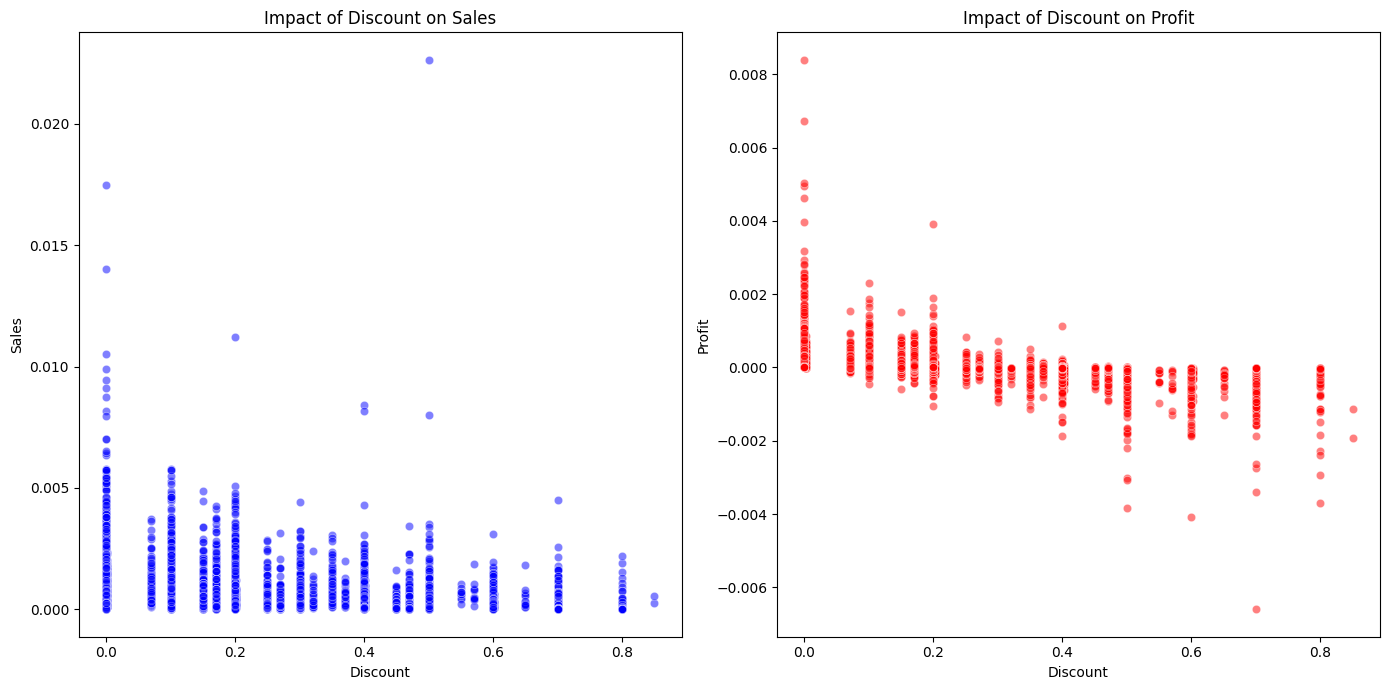

In [ ]:
# Creating a scatter plot to analyze the impact of discounts on sales and profit
plt.figure(figsize=(14, 7))

# Scatter plot for Discount vs Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount($)', y='Sales($)', data=glo_store1, color='blue', alpha=0.5)
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

# Scatter plot for Discount vs Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount($)', y='Profit($)', data=glo_store1, color='red', alpha=0.5)
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

There is no direct impact of discount on sales and profits.

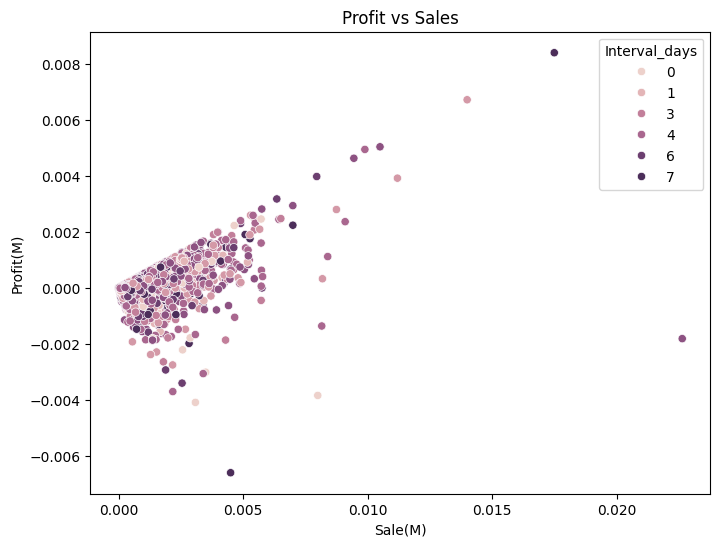

In [ ]:
# Scatter plot for Profit vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales($)', y='Profit($)', data=glo_store1, hue = 'Interval_days')
plt.title('Profit vs Sales')
plt.xlabel('Sale(M)')
plt.ylabel('Profit(M)')
plt.show()
# sns.scatterplot(data=interval_groups, x='Sales($)', y='Profit($)', hue='Interval_category')
# plt.title('Scatterplot of Sales vs Profit (Colored by Interval_bin)')
# plt.show()

As sales increase, profits increase

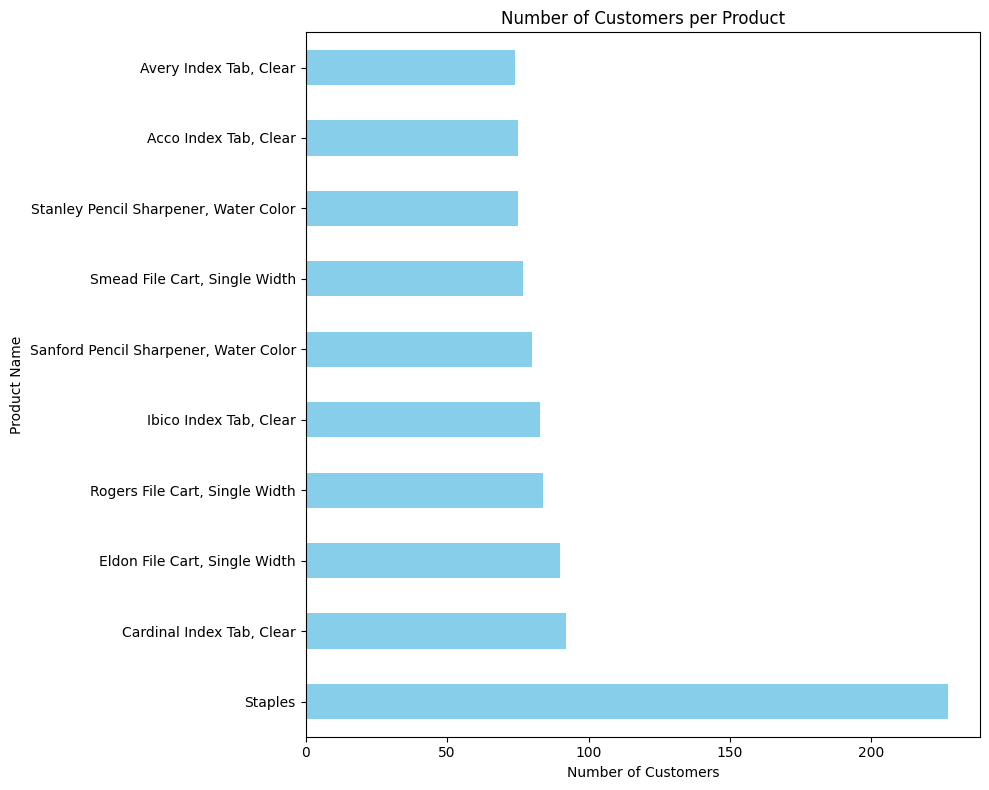

In [ ]:
product_customer_count = glo_store1.groupby('Product_Name')['Customer_ID'].count().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 8))
product_customer_count.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Customers')
plt.ylabel('Product Name')
plt.title('Number of Customers per Product')
plt.tight_layout()
plt.show()


**Observation:** About 227 customers bought staples.

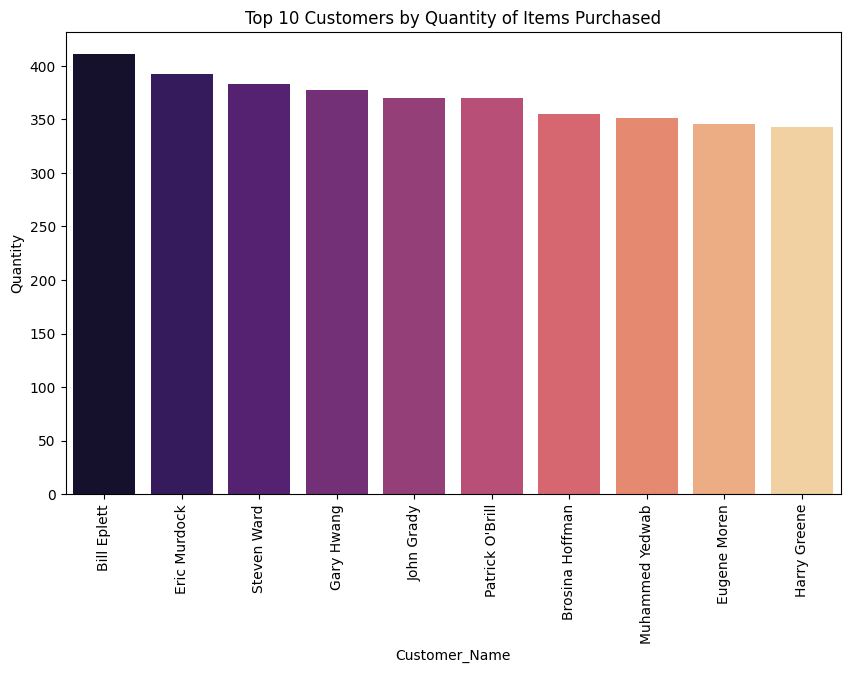

In [ ]:
# Groupby CustomerID and calculate the total quantity bought by each customer
top_customers = glo_store1.groupby('Customer_Name')['Quantity'].sum().reset_index()

# Sort the DataFrame by Quantity in descending order and select the top 10 customers
top_customers = top_customers.sort_values(by='Quantity', ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Name',y='Quantity', data=top_customers, palette='magma')

# Set labels and title
plt.xlabel('Customer_Name')
plt.ylabel('Quantity')
plt.title('Top 10 Customers by Quantity of Items Purchased')
plt.xticks(rotation=90)

plt.show()


Bill Eplett purchased the most items

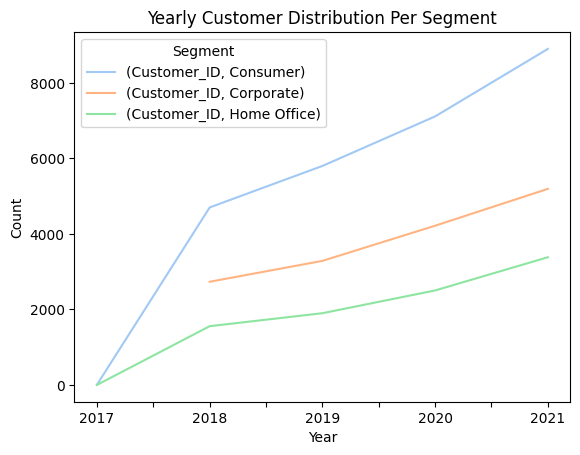

In [ ]:
customer_base =glo_store1.pivot_table(index = ['Year'],
                       columns ='Segment',
                       values = ['Customer_ID'],
                      aggfunc = 'count')


# cat_loss = cat_income['Loss($)']

# Plotting the bar plot
customer_base.plot(kind='line',  color=sns.color_palette('pastel'))

# Setting the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
# plt.xticks(rotation = 315)
plt.title('Yearly Customer Distribution Per Segment')
plt.legend(title='Segment')

Corporate segment was introduced in 2018.\
Consumer segment had the highest number of customers over the years, while home office had the least.


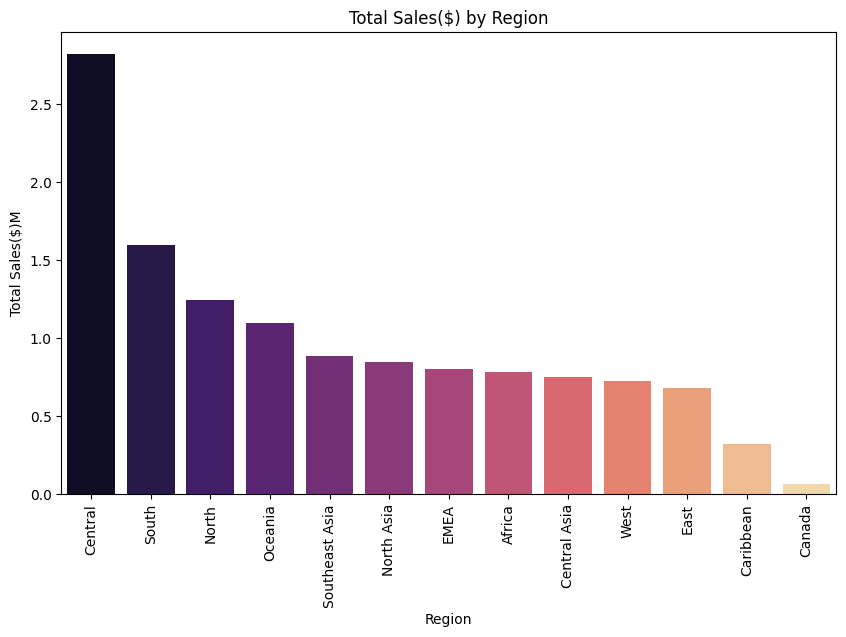

In [ ]:
# Total Sales by Region
plt.figure(figsize=(10, 6))
region_sales = glo_store1.groupby('Region')['Sales($)'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')
plt.title('Total Sales($) by Region')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Total Sales($)M')
plt.show()

 Central Region recorded the highest sales amongst all the regions.


### Multivariate Analysis

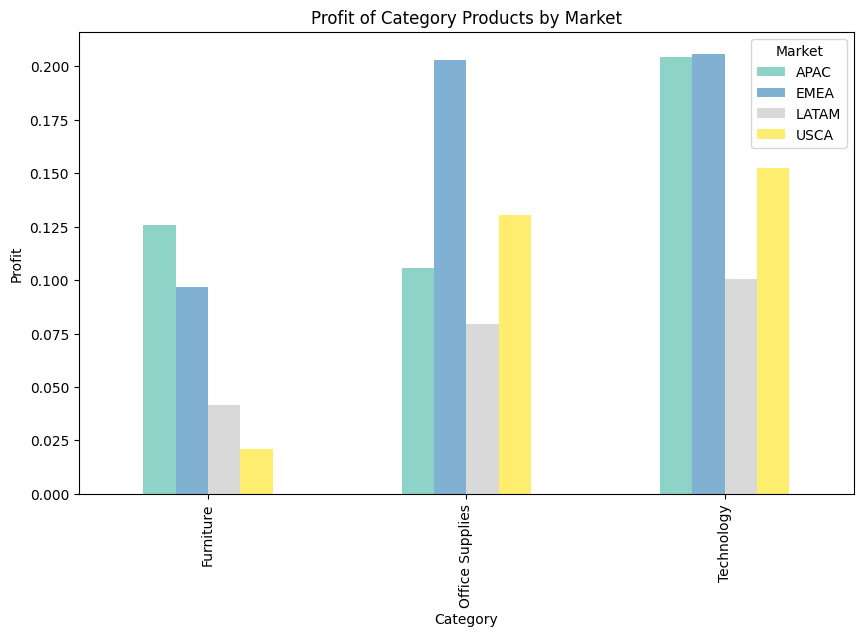

In [ ]:
cat_mar =glo_store1.pivot_table(index = ['Category'],
                       columns ='Market',
                       values = ['Sales($)','Profit($)','Loss($)'],
                      aggfunc = 'sum')
cat_marp = cat_mar['Profit($)']
cat_marp.plot(kind='bar', stacked=False, figsize=(10, 6), colormap = 'Set3')
plt.title('Profit of Category Products by Market')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

 EMEA market recorded the highest profit in furniture and technology categories. While APAC has the highest profit in furniture over the 4 year period.









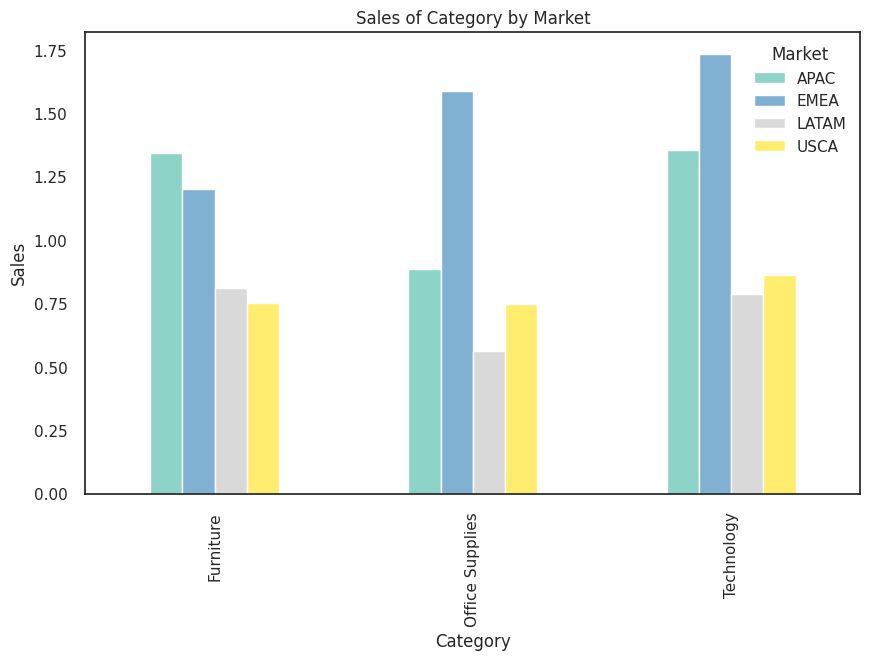

In [ ]:
cat_mars = cat_mar['Sales($)']
cat_mars.plot(kind='bar', stacked=False, figsize=(10, 6), colormap = 'Set3')
plt.title('Sales of Category by Market')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

 EMEA market recorded the highest sales in furniture and technology categories.


While APAC has the highest sales in furniture over the 4 year period.









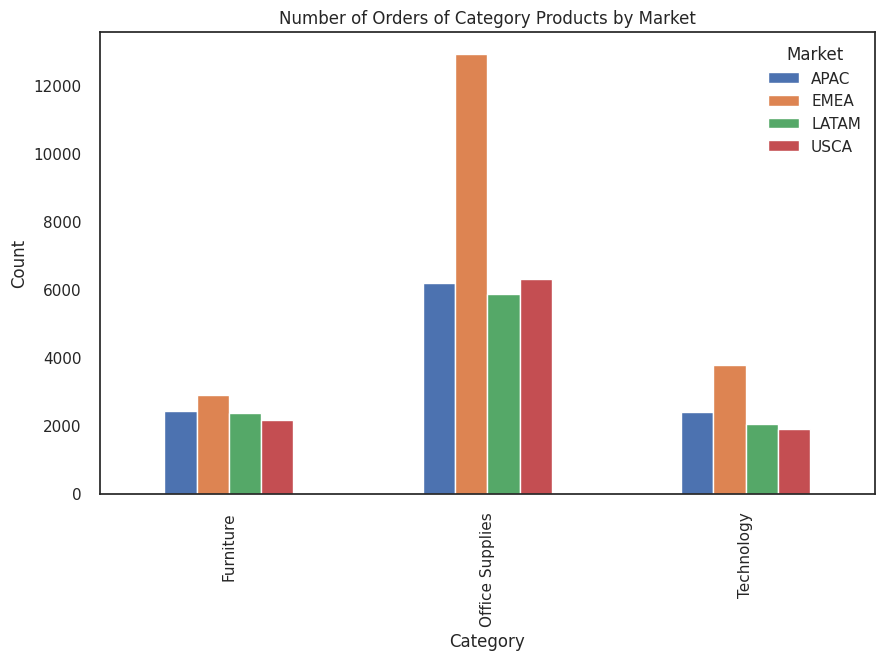

In [ ]:
category_market = glo_store1.groupby(['Category', 'Market']).size().unstack()
category_market.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Number of Orders of Category Products by Market')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Observation:** EMEA market has the highest category orders when it comes to funitures,office supplies and technology.

In [ ]:
cat_income =glo_store1.pivot_table(index = ['Category'],
                       columns ='Year',
                       values = ['Sales($)','Profit_($)','Loss($)','Discount($)'],
                      aggfunc = 'sum')

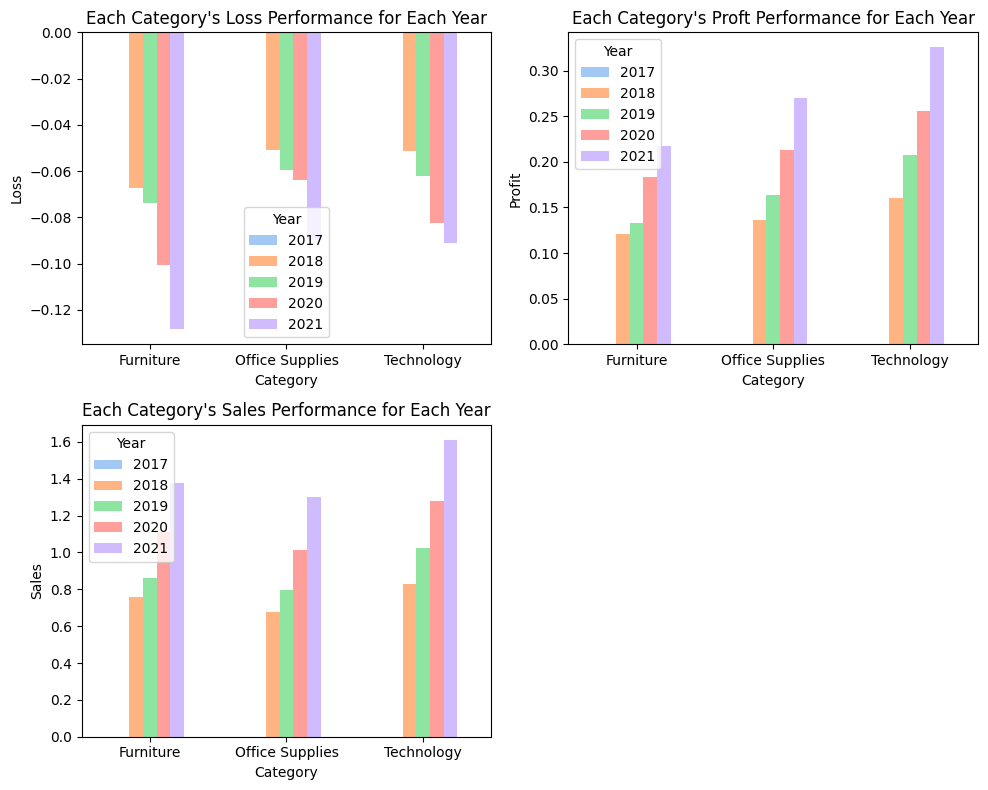

In [ ]:
 # Creating a bar graph for Category's Profit, Sales and Loss for each year

plt.figure(figsize = (10,8))
# Creating a Loss bar graph
p_1 = plt.subplot(2,2,1)
cat_loss = cat_income['Loss($)']
cat_loss.plot(kind='bar', stacked = False,
              color=sns.color_palette('pastel'),ax=p_1)
plt.xlabel('Category')
plt.ylabel('Loss')
plt.xticks(rotation = 0)
plt.title('Each Category\'s Loss Performance for Each Year')
plt.legend(title='Year',)


# Creating a Profit bar graph
p_2 = plt.subplot(2,2,2)
cat_profit = cat_income['Profit_($)']
cat_profit.plot(kind='bar', stacked = False,
                color=sns.color_palette('pastel'),ax=p_2)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation = 0)
plt.title('Each Category\'s Proft Performance for Each Year')
plt.legend(title='Year')


# Creating a Sales bar graph
p_3 = plt.subplot(2,2,3)
cat_sales = cat_income['Sales($)']
cat_sales.plot(kind='bar', stacked = False,
               color=sns.color_palette('pastel'),ax=p_3)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation =0)
plt.title('Each Category\'s Sales Performance for Each Year')
plt.legend(title='Year')


#Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.5, hspace=1)

plt.tight_layout()
plt.show()

**Observation**

Across the various graphs (Sales, Profit Only,and  Loss Only, with respect to category), 2021 has the highest sales, profit only, and loss only across the respective categories. while 2018 has the least sales, profit only, and loss only across the respective categories.



## **Feature Engineering**

**Calculating the RFM metrics**

In [ ]:
for col in glo_store.columns:
    print(col)

Order_ID
Category
City
Country
Customer_Name
Market
Customer_ID
Order_Date
Ship_Date
Order_Priority
Product_ID
Product_Name
Region
Segment
Ship_Mode
State
Sub_Category
Discount($)
Profit($)
Quantity
Sales($)
Shipping_Cost($)
Loss($)
Interval_days
Month
Year
Unit Price($)
Day
Profit_($)


In [ ]:
df = glo_store[['Customer_ID','Order_ID','Order_Date','Unit Price($)','Quantity']]

In [ ]:
df.shape

(51290, 5)

**Retention Rate**

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
def get_dates(df, col):

    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day

    return year, month, day

In [ ]:
# df["OrderMonth"] = df["Order_Date"].apply(get_month)

# df["CohortMonth"] = df.groupby("Customer_ID")["OrderMonth"].transform("min")

In [ ]:
import datetime as dt
df["OrderMonth"] = df["Order_Date"].apply(get_month)
df0 = df[df['OrderMonth'] >= '2021-01-01']
df["CohortMonth"] = df0.groupby("Customer_ID")["OrderMonth"].transform("min")

In [ ]:
df.head()

,Customer_ID,Order_ID,Order_Date,Unit Price($),Quantity,OrderMonth,CohortMonth
Global_Orders_ID,,,,,,,
1,RB-194654,CA-2013-158568,2020-08-28,31.992,3,2020-08-01,NaT
2,RB-194654,CA-2013-158568,2020-08-28,0.596,3,2020-08-01,NaT
3,AB-100604,CA-2013-161207,2020-08-28,9.310,3,2020-08-01,NaT
4,MO-178004,CA-2013-128727,2020-08-28,5.500,4,2020-08-01,NaT
5,GB-145304,CA-2013-159912,2020-08-28,60.480,4,2020-08-01,NaT


In [ ]:
order_year, order_month, order_day = get_dates(df, "OrderMonth")
cohort_year, cohort_month, cohort_day = get_dates(df, "CohortMonth")

year_diff = order_year - cohort_year
month_diff = order_month - cohort_month

df["CohortIndex"] = 12 * year_diff + month_diff + 1

In [ ]:
cohort_data = df.groupby(["CohortIndex", "CohortMonth"])["Customer_ID"].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index = "CohortMonth", columns = "CohortIndex", values = "Customer_ID")

cohort_pivot

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CohortMonth,,,,,,,,,,,,
2021-01-01,405.0,31.0,42.0,46.0,54.0,73.0,41.0,61.0,82.0,52.0,83.0,82.0
2021-02-01,353.0,41.0,37.0,45.0,65.0,27.0,63.0,76.0,56.0,58.0,76.0,NaN
2021-03-01,445.0,51.0,53.0,74.0,65.0,78.0,93.0,70.0,90.0,87.0,NaN,NaN
2021-04-01,364.0,56.0,64.0,45.0,58.0,69.0,59.0,85.0,79.0,NaN,NaN,NaN
2021-05-01,392.0,70.0,46.0,66.0,63.0,56.0,100.0,66.0,NaN,NaN,NaN,NaN
2021-06-01,469.0,52.0,75.0,87.0,86.0,95.0,81.0,NaN,NaN,NaN,NaN,NaN
2021-07-01,242.0,37.0,43.0,32.0,54.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,335.0,67.0,47.0,79.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,309.0,48.0,67.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")

retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CohortMonth,,,,,,,,,,,,
2021-01,1.0,0.076543,0.103704,0.113580,0.133333,0.180247,0.101235,0.150617,0.202469,0.128395,0.204938,0.202469
2021-02,1.0,0.116147,0.104816,0.127479,0.184136,0.076487,0.178470,0.215297,0.158640,0.164306,0.215297,NaN
2021-03,1.0,0.114607,0.119101,0.166292,0.146067,0.175281,0.208989,0.157303,0.202247,0.195506,NaN,NaN
2021-04,1.0,0.153846,0.175824,0.123626,0.159341,0.189560,0.162088,0.233516,0.217033,NaN,NaN,NaN
2021-05,1.0,0.178571,0.117347,0.168367,0.160714,0.142857,0.255102,0.168367,NaN,NaN,NaN,NaN
2021-06,1.0,0.110874,0.159915,0.185501,0.183369,0.202559,0.172708,NaN,NaN,NaN,NaN,NaN
2021-07,1.0,0.152893,0.177686,0.132231,0.223140,0.210744,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1.0,0.200000,0.140299,0.235821,0.217910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,1.0,0.155340,0.216828,0.142395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


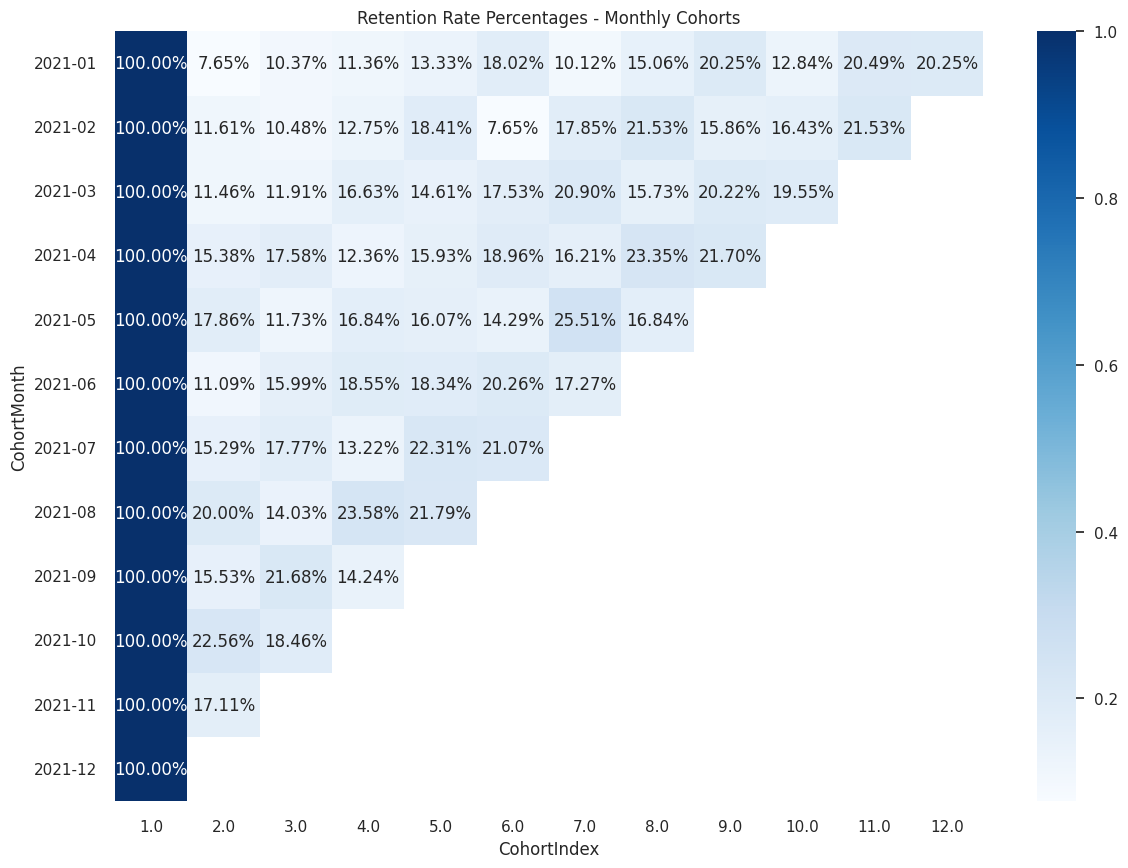

In [ ]:
plt.rcParams["axes.facecolor"] = "white"
fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(retention, cmap = "Blues", annot = True, fmt = ".2%", annot_kws = {"fontsize": 12}, cbar = True, ax = ax)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()


**Observation**

For the year 2021,

There are 12 different cohort for the each month

In December, 2021:

The cohort month with highest retention rate(21.79%) is August(08-2021) .

The cohort month with lowest retention rate(14.24%) is September(08-2021).

The rentention rate for December's cohort is 100% because that's focus month and new customers within that month make up December's cohort.

**Creating a hypothetical snapshot_day**

Let the snap short day be the day after the last transaction

In [ ]:
import datetime as dt
snapshot_date = max(df['Order_Date'])+dt.timedelta(days = 1)

print('last date:',max(df['Order_Date']),'\n')
print('snapshot_date:',snapshot_date )

last date: 2021-12-29 00:00:00 

snapshot_date: 2021-12-30 00:00:00


In [ ]:
#calculating the recency, frequency and monetary value of each customer

rfm_data = glo_store.groupby(['Customer_ID']).agg({'Order_Date':lambda x:(snapshot_date - x.max()).days,
                                                'Order_ID':'count',
                                                 'Sales($)':'sum'})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
rfm_data.head()

,Recency,Frequency,Monetary
Customer_ID,,,
AA-103151,9,10,1445.406
AA-103152,14,16,6105.627
AA-103153,695,5,632.820
AA-103154,185,11,5563.560
AA-103751,7,9,2407.245


**Creating quatiles for the metrics**

In [ ]:
r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

rfm_data["R"] = pd.qcut(rfm_data["Recency"], 5, labels = r_labels)
rfm_data["F"] = pd.qcut(rfm_data["Frequency"].rank(method = 'first'), 5, labels = fm_labels)
rfm_data["M"] = pd.qcut(rfm_data["Monetary"], 5, labels = fm_labels)

rfm_data.head()

,Recency,Frequency,Monetary,R,F,M
Customer_ID,,,,,,
AA-103151,9,10,1445.406,5,3,3
AA-103152,14,16,6105.627,5,4,5
AA-103153,695,5,632.820,1,1,2
AA-103154,185,11,5563.560,2,3,5
AA-103751,7,9,2407.245,5,3,3


In [ ]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4873 entries, AA-103151 to ZD-219254
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4873 non-null   int64   
 1   Frequency  4873 non-null   int64   
 2   Monetary   4873 non-null   float64 
 3   R          4873 non-null   category
 4   F          4873 non-null   category
 5   M          4873 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 166.9+ KB


In [ ]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,4873.000000,4873.000000,4873.000000
mean,207.402422,10.525344,2594.398094
std,254.446052,6.562775,2465.885967
min,1.000000,1.000000,2.052000
25%,42.000000,6.000000,728.106000
50%,110.000000,10.000000,1893.552000
75%,269.000000,14.000000,3762.666000
max,1460.000000,40.000000,25043.050000


In [ ]:
# Creating RFM Segment and RFM Score
rfm_data["RFM_Segment"] = rfm_data["R"].astype(str) + rfm_data["F"].astype(str) + rfm_data["M"].astype(str)
rfm_data["RFM_Score"] = rfm_data[["R", "F", "M"]].sum(axis = 1)

rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
AA-103151,9,10,1445.406,5,3,3,533,11
AA-103152,14,16,6105.627,5,4,5,545,14
AA-103153,695,5,632.820,1,1,2,112,4
AA-103154,185,11,5563.560,2,3,5,235,10
AA-103751,7,9,2407.245,5,3,3,533,11


**Inspecting the RFM metrics**

In [ ]:
rfm_data["RFM_Segment"].nunique()

114

In [ ]:
rfm_data.groupby('RFM_Segment').size().sort_values(ascending = False )[:10]

RFM_Segment
111    354
555    185
455    160
211    149
355    135
122    102
222    101
444     90
112     86
454     85
dtype: int64

In [ ]:
rfm_data[rfm_data['RFM_Segment']=='111'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
AA-3752,826,1,26.88,1,1,1,111,3
AA-4801,876,5,496.62,1,1,1,111,3
AB-1051,403,2,96.60,1,1,1,111,3
AB-1652,710,1,410.88,1,1,1,111,3
AC-4502,920,2,147.18,1,1,1,111,3


In [ ]:
rfm_data['RFM_Segment'].value_counts()

RFM_Segment
111    354
555    185
455    160
211    149
355    135
      ... 
341      2
414      1
441      1
214      1
514      1
Name: count, Length: 114, dtype: int64

**Summary of the metrics**

In [ ]:
rfm_data.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})


Recency  Frequency     Monetary      
                 mean       mean         mean count
RFM_Score                                          
3          759.067797   2.141243   181.631076   354
4          424.386986   3.414384   422.804280   292
5          369.619672   4.757377   654.956878   305
6          267.688525   5.663934   910.722143   366
7          203.039900   6.528678  1197.236734   401
8          180.668380   8.095116  1603.672182   389
9          154.627753   9.762115  2063.417890   454
10         124.886957  11.115217  2558.632773   460
11         105.830898  12.891441  3332.463687   479
12          85.812500  15.073276  4199.599616   464
13          58.726392  17.731235  5000.736731   413
14          33.511254  19.643087  5851.892975   311
15          15.129730  22.151351  6885.778310   185

**RFM Segments**

Champions: Bought recently, buy often and spend the most

Loyal customers: Buy on a regular basis. Responsive to promotions.

Potential loyalist: Recent customers with average frequency.

Recent customers: Bought most recently, but not often.

Promising: Recent shoppers, but haven’t spent much.

Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.

About to sleep: Below average recency and frequency. Will lose them if not reactivated.

At risk: Some time since they’ve purchased. Need to bring them back!

Can’t lose them: Used to purchase frequently but haven’t returned for a long time.

Hibernating: Last purchase was long back and low number of orders. May be lost.

In [ ]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm_data['Segment'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str)
rfm_data['Segment'] = rfm_data['Segment'].replace(segt_map, regex=True)
rfm_data.tail()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
Customer_ID,,,,,,,,,
ZD-119252,398,9,1935.9000,1,3,3,133,7,At-Risk
ZD-219251,19,10,1889.2575,5,3,3,533,11,Potential Loyalists
ZD-219252,2,14,4545.7215,5,4,5,545,14,Champions
ZD-219253,197,3,1550.4214,2,1,3,213,6,Hibernating
ZD-219254,203,9,1493.9440,2,3,3,233,8,At-Risk


**Analyzing the rfm segments**

In [ ]:
rfm_data.groupby('Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)


Recency Frequency Monetary      
                       mean      mean     mean count
Segment                                             
About To Sleep        115.0       5.0   1165.0   323
At-Risk               332.0      11.0   2701.0   619
Cannot lose them      270.0      20.0   4950.0   175
Champions              16.0      18.0   4534.0   540
Hibernating           510.0       4.0    820.0  1141
Loyal Customers        79.0      17.0   4516.0   963
Need Attention        114.0      10.0   2315.0   198
New Customers          18.0       3.0    671.0    77
Potential Loyalists    34.0       8.0   1920.0   745
Promising              54.0       3.0    599.0    92

**Visualizing the Segments**

In [ ]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot lose them": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

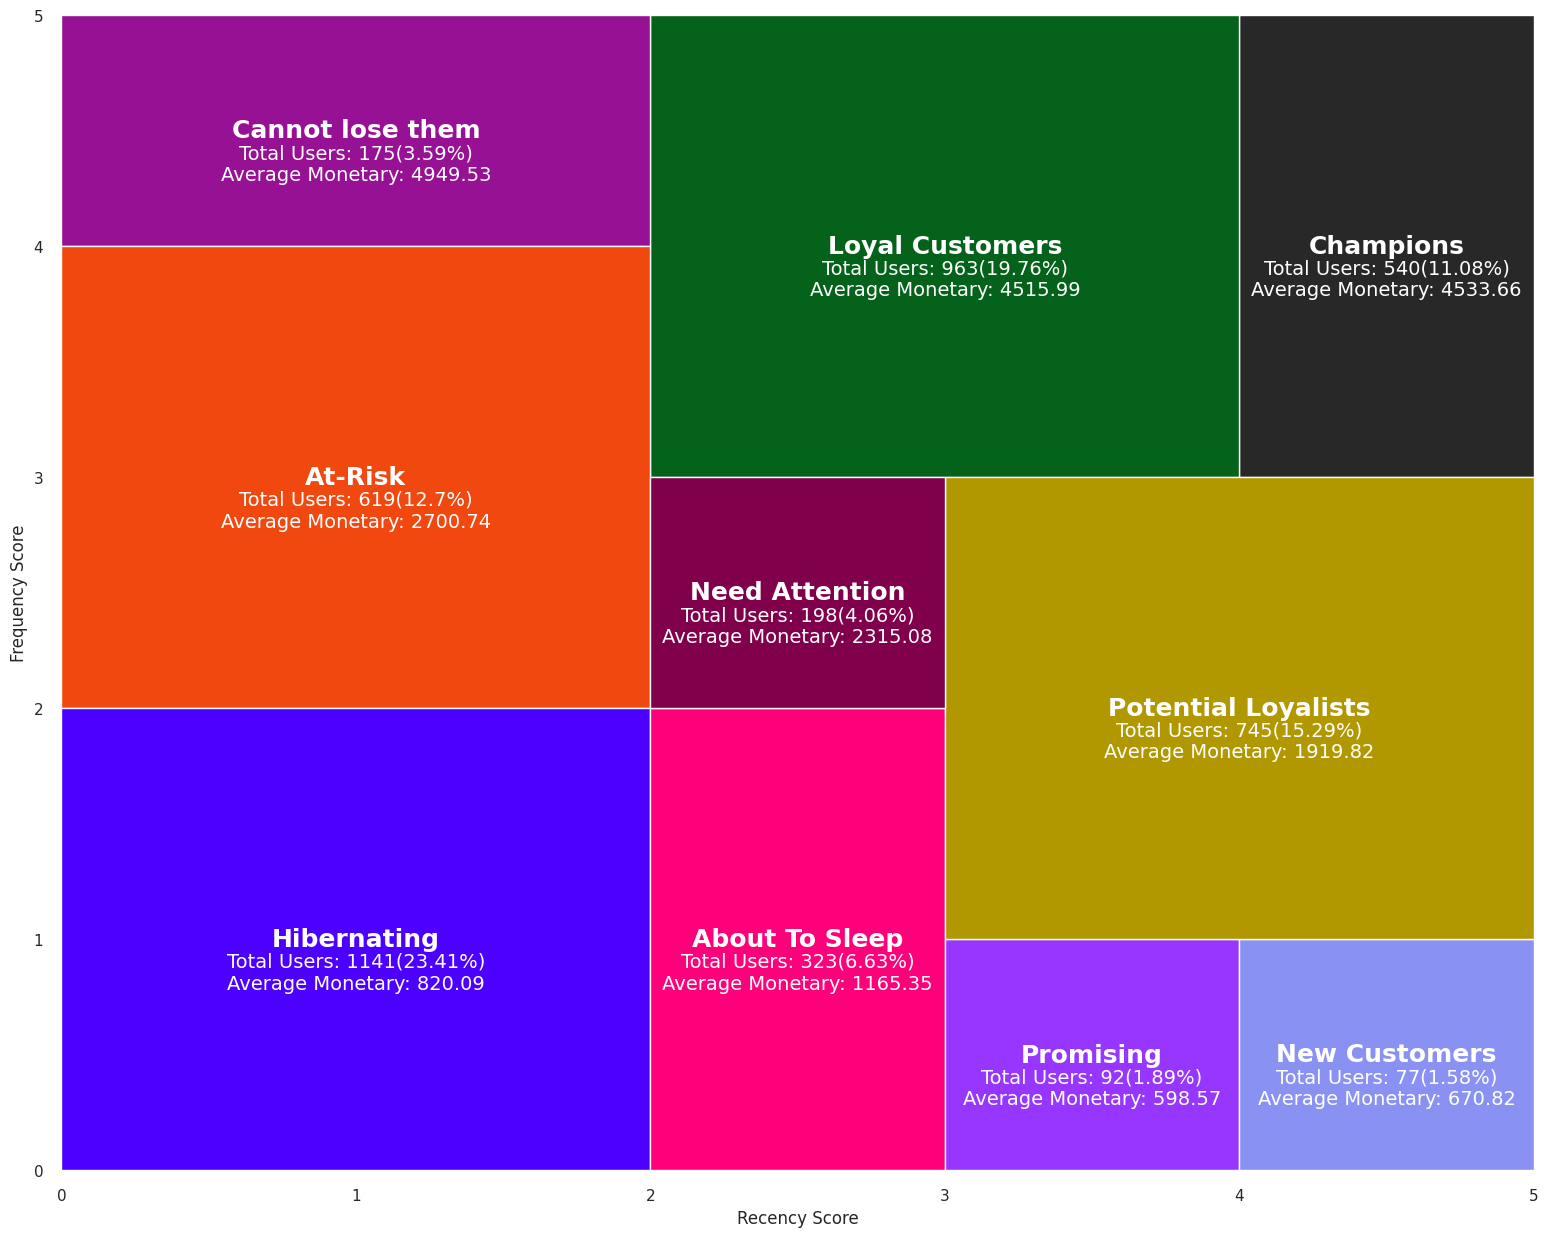

In [ ]:
fig, ax = plt.subplots(figsize = (19, 15))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):

    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]

    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)

    users = rfm_data[rfm_data.Segment == key].shape[0]
    users_percentage = (rfm_data[rfm_data.Segment == key].shape[0] / rfm_data.shape[0]) * 100
    avg_monetary = rfm_data[rfm_data.Segment == key]["Monetary"].mean()

    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))

    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2

    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 14, color = "white")
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 14, color = "white")

    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")

sns.despine(left = True, bottom = True)
plt.show()

**Observation**

From the graph above, it is observed that customers within the Cannot Lose Them group have 175 individuals(3.59%) and the highest average monetary value of
4949.53.  While customers within the Promising group have 92 individuals(1.89%) and the lowest average monetary value of $598.57 .

** **

## **Data Pre-processing for K-means Algorithm**

In [ ]:
# Creating a function to explore the variables

def explore_num(df,x):
    '''
    Calcilates summary statistics of a given numerical  column from a Pandas DataFrame.

    Input: Pandas DataFrame and column name

    Output: Returns the length,
                        minimum,
                        maximum,
                        median,
                        mean,
                        standard deviation,
                        number of missing values,
                        boxplot,
                        and a histogram


    '''
    print('Summary Statistics \n')
    print(df[x].apply([len,min,max,np.median,np.mean,np.std]))
    print('======================================')
    print('Missing values: {}'.format(df[x].isnull().sum()))
    print('======================================\n')
    plt.figure(figsize = (8,4))
    #plotting a boxplot
    meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
    medianprops = dict(linestyle='-.', linewidth=3, color='gold')
    plt.subplot(1,2,1)
    plt.boxplot(df[x],vert=True,patch_artist=True,notch = True,
            showmeans = True,medianprops = medianprops,meanprops = meanpointprops)
    plt.xlabel(df[x].name)
    plt.title('Boxplot')

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x])
    plt.title('Histogram')
    plt.tight_layout()
    plt.show()

Summary Statistics 

len       4873.000000
min          1.000000
max       1460.000000
median     110.000000
mean       207.402422
std        254.446052
Name: Recency, dtype: float64
Missing values: 0



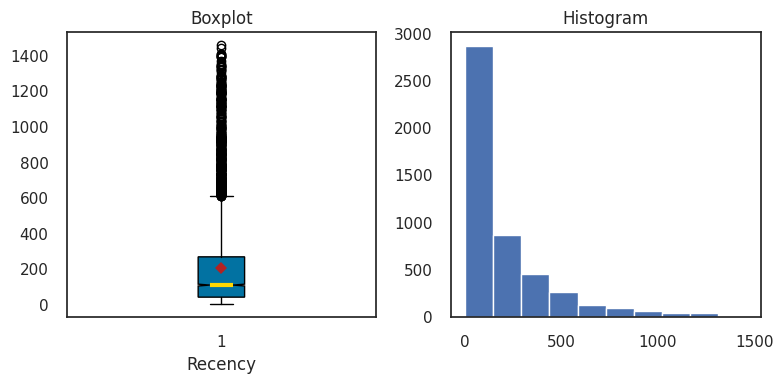

In [ ]:
explore_num(rfm_data,'Recency')

Summary Statistics 

len       4873.000000
min          1.000000
max         40.000000
median      10.000000
mean        10.525344
std          6.562775
Name: Frequency, dtype: float64
Missing values: 0



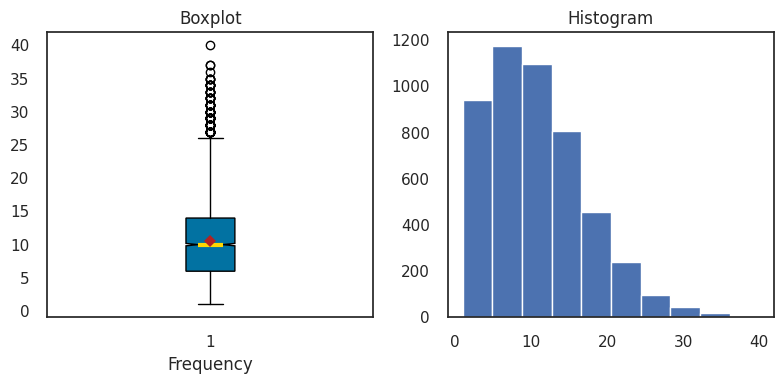

In [ ]:
explore_num(rfm_data,'Frequency')

Summary Statistics 

len        4873.000000
min           2.052000
max       25043.050000
median     1893.552000
mean       2594.398094
std        2465.885967
Name: Monetary, dtype: float64
Missing values: 0



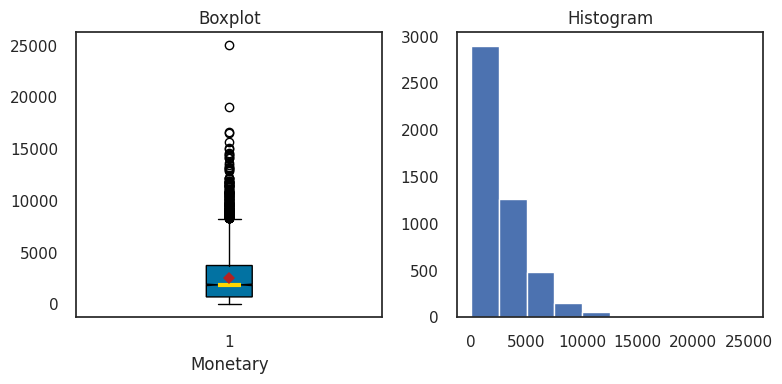

In [ ]:
explore_num(rfm_data,'Monetary')

From the graphs above, it can seen that all the variables are skewed to the right.

This implies that the data needs to be normalized.

Log transformation is adopted below to handle this issue.

**Transforming the data using log**

In [ ]:
rfm_data['Frequency_log']= np.log(rfm_data['Frequency'])
rfm_data['Monetary_log']= np.log(rfm_data['Monetary'])
rfm_data['Recency_log']= np.log(rfm_data['Recency'])

**Exploring the data after transformation**

Summary Statistics 

len       4873.000000
min          0.000000
max          7.286192
median       4.700480
mean         4.570327
std          1.405337
Name: Recency_log, dtype: float64
Missing values: 0



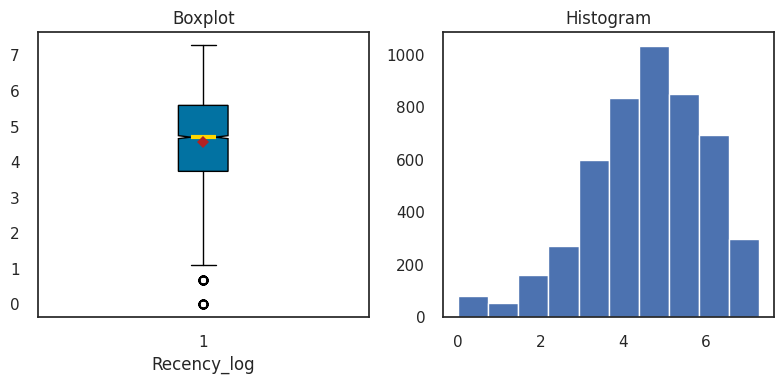

In [ ]:
explore_num(rfm_data,'Recency_log')

Summary Statistics 

len       4873.000000
min          0.000000
max          3.688879
median       2.302585
mean         2.110378
std          0.777385
Name: Frequency_log, dtype: float64
Missing values: 0



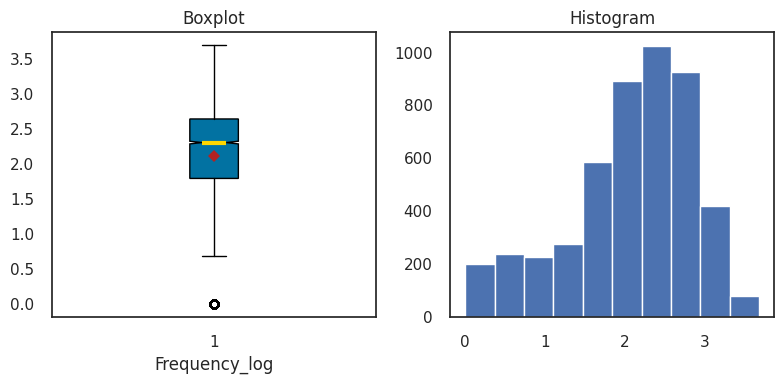

In [ ]:
explore_num(rfm_data,'Frequency_log')

Summary Statistics 

len       4873.000000
min          0.718815
max         10.128352
median       7.546210
mean         7.260842
std          1.346461
Name: Monetary_log, dtype: float64
Missing values: 0



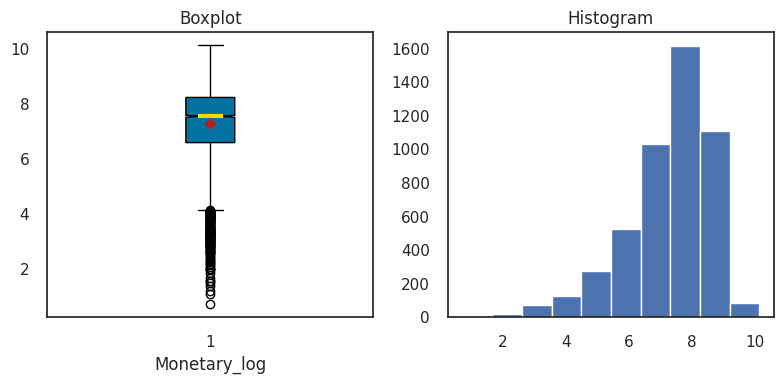

In [ ]:
explore_num(rfm_data,'Monetary_log')

After the log transformation, the histograms of the various variables indicate that the variables are normalized or fairly normalized.

**Centering and scaling the data**

For Kmeans algorimth to perform well, the data need to be centered and put at the same scale.

This is done below using StandardScaler from sklearn.

In [ ]:
rfm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4873.0,207.402422,254.446052,1.000000,42.000000,110.000000,269.000000,1460.000000
Frequency,4873.0,10.525344,6.562775,1.000000,6.000000,10.000000,14.000000,40.000000
Monetary,4873.0,2594.398094,2465.885967,2.052000,728.106000,1893.552000,3762.666000,25043.050000
RFM_Score,4873.0,9.006977,3.444546,3.000000,6.000000,9.000000,12.000000,15.000000
Frequency_log,4873.0,2.110378,0.777385,0.000000,1.791759,2.302585,2.639057,3.688879
Monetary_log,4873.0,7.260842,1.346461,0.718815,6.590447,7.546210,8.232883,10.128352
Recency_log,4873.0,4.570327,1.405337,0.000000,3.737670,4.700480,5.594711,7.286192


In [ ]:
df1 = rfm_data[['Recency_log','Frequency_log','Monetary_log']]

In [ ]:
df1.describe().round(1)

,Recency_log,Frequency_log,Monetary_log
count,4873.0,4873.0,4873.0
mean,4.6,2.1,7.3
std,1.4,0.8,1.3
min,0.0,0.0,0.7
25%,3.7,1.8,6.6
50%,4.7,2.3,7.5
75%,5.6,2.6,8.2
max,7.3,3.7,10.1


In [ ]:
# Scaling the data using the standardscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

In [ ]:
#df_scaled is now a numpy array

print(df_scaled.mean(axis=0).round(2))
print(df_scaled.std(axis=0).round(2))

[ 0.  0. -0.]
[1. 1. 1.]


**Creating clusters using KMeans Algorithm**

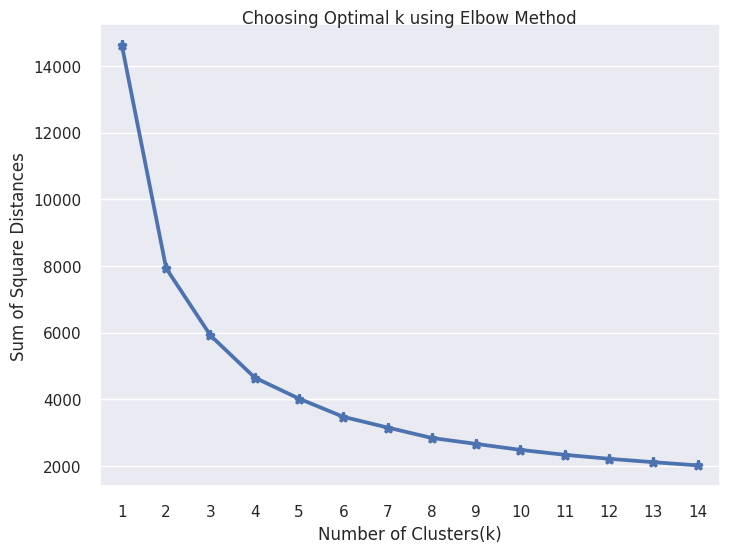

In [ ]:
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(df_scaled)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters\
plt.figure(figsize  = (8,6))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),markers = '*')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Choosing Optimal k using Elbow Method',pad = 0.8)
plt.show()

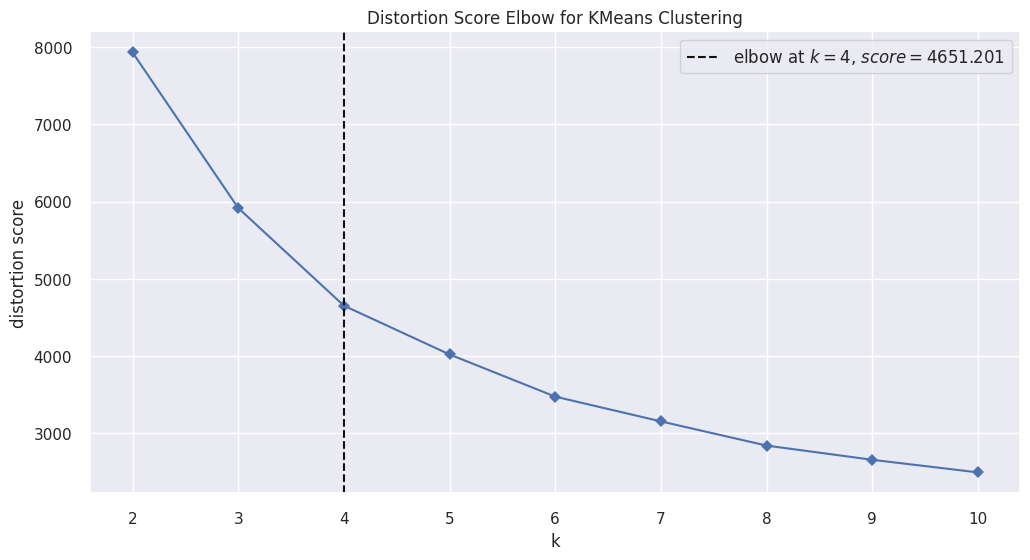

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(12,6))
Elbow_M = KElbowVisualizer(KMeans(), k=10, timings = False)
Elbow_M.fit(df_scaled)
Elbow_M.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model

KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000,random_state = 3)
KMean_clust.fit(df_scaled)

#Find the clusters for the observation given in the dataset
rfm_data['Clusters'] = KMean_clust.labels_
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment,Frequency_log,Monetary_log,Recency_log,Clusters
Customer_ID,,,,,,,,,,,,,
AA-103151,9,10,1445.406,5,3,3,533,11,Potential Loyalists,2.302585,7.276146,2.197225,1
AA-103152,14,16,6105.627,5,4,5,545,14,Champions,2.772589,8.716966,2.639057,1
AA-103153,695,5,632.820,1,1,2,112,4,Hibernating,1.609438,6.450186,6.543912,0
AA-103154,185,11,5563.560,2,3,5,235,10,At-Risk,2.397895,8.623993,5.220356,3
AA-103751,7,9,2407.245,5,3,3,533,11,Potential Loyalists,2.197225,7.786238,1.945910,1


In [ ]:
# Sectioning the metrics and the clusters into a data frame.
rfm = rfm_data[['Recency','Frequency','Monetary','Clusters']]

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Clusters
Customer_ID,,,,
AA-103151,9,10,1445.406,1
AA-103152,14,16,6105.627,1
AA-103153,695,5,632.820,0
AA-103154,185,11,5563.560,3
AA-103751,7,9,2407.245,1


**Analyzing the the Clusters**

In [ ]:
rfm.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
            mean      mean     mean count
Clusters                                 
0          289.0       6.0   1121.0  1518
1           18.0      13.0   3158.0  1023
2          502.0       2.0    176.0   602
3          145.0      16.0   4395.0  1730

**Number customers in a cluster**

* Cluster 0 contains 1518 customers
* Cluster 1 contains 1023 customers
* Cluster 2 contains 602 customers
* Cluster 3 contains 1730 customers

**Cluster 0**

Customers in this segment have not engaged with the company recently, making fewer transactions and contributing less to the company's revenue. They may require targeted efforts to re-engage them, understand their preferences, and incentivize them to make purchases.

**Cluster 1**

Customers in this segment are very active, making a high number of transactions and contributing significantly to the company's revenue. They represent an important customer group that requires attention to maintain their loyalty and satisfaction through personalized experiences and rewards.

**Cluster 2**

Customers in this segment are inactive, with fewer transactions and lower monetary contributions. They may have lapsed in engagement and require efforts to re-engage them through targeted marketing campaigns and promotions tailored to their preferences.



**Cluster 3**

Customers in this segment are both highly active and valuable, making a significant number of transactions and contributing the most to the company's revenue. They represent the most valuable customer group and require prioritized efforts to maintain their loyalty, satisfaction, and lifetime value through personalized experiences and incentives.


**Visualizing clusters with regards to the metrics**

Changing the scaled data to a DataFrame to enhance visualization

In [ ]:
df_scaled = pd.DataFrame(df_scaled,index =rfm_data.index,columns = ['Recency','Frequency','Monetary'])

In [ ]:
df_scaled.head()

,Recency,Frequency,Monetary
Customer_ID,,,
AA-103151,-1.688809,0.247274,0.011367
AA-103152,-1.374380,0.851931,1.081557
AA-103153,1.404494,-0.644458,-0.602126
AA-103154,0.462591,0.369890,1.012500
AA-103751,-1.867656,0.111728,0.390245


In [ ]:
df_scaled['Clusters'] = KMean_clust.labels_

In [ ]:
df_scaled.head()

,Recency,Frequency,Monetary,Clusters
Customer_ID,,,,
AA-103151,-1.688809,0.247274,0.011367,1
AA-103152,-1.374380,0.851931,1.081557,1
AA-103153,1.404494,-0.644458,-0.602126,0
AA-103154,0.462591,0.369890,1.012500,3
AA-103751,-1.867656,0.111728,0.390245,1


**Melting the data**

In [ ]:
melt_data = pd.melt(df_scaled.reset_index(),
                   id_vars = ['Customer_ID','Clusters'],
                   value_vars = ['Recency','Frequency','Monetary'],
                   var_name='Attribute',
                   value_name = 'Value')

In [ ]:
melt_data.head()

,Customer_ID,Clusters,Attribute,Value
0,AA-103151,1,Recency,-1.688809
1,AA-103152,1,Recency,-1.374380
2,AA-103153,0,Recency,1.404494
3,AA-103154,3,Recency,0.462591
4,AA-103751,1,Recency,-1.867656


**Visualizing the clusters using a snake plot**

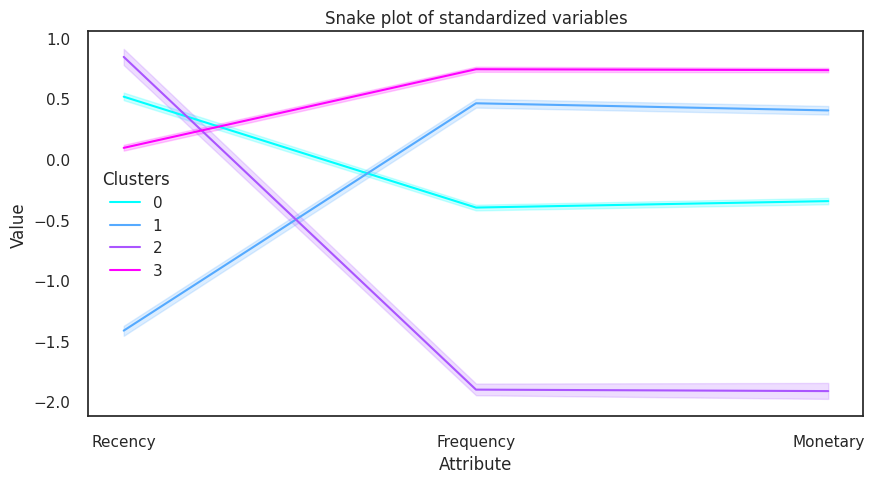

In [ ]:
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',y='Value',hue = 'Clusters',data = melt_data, palette = 'cool')
plt.show()

Considering the snakeplot above, cluster 3 has the highest frequency and monetary _value and the lowest recency value_. This means it is the most active group and contribute the most to the company.

On the other hand,

Cluster 0 has the second lowest frequency and monetary value, and the second highest recency value. It is the third active group and needs more engagement.

Cluster 1 has average values with regards to frequency monetary and recency. This second most important group to the company.

Cluster 2 has the highest recency value but the least frequency and monetary value. It is the least active group and needs more engagement.

**Relative importance**

In [ ]:
metrics = rfm_data[['Recency','Frequency','Monetary','Clusters']]

In [ ]:
cluster_avg = metrics.groupby(['Clusters']).mean()
population_avg = metrics[['Recency','Frequency','Monetary']].mean()
relative_importance = cluster_avg/population_avg - 1

In [ ]:
cluster_avg.round(2)

,Recency,Frequency,Monetary
Clusters,,,
0,288.69,6.48,1121.48
1,18.26,13.03,3157.54
2,501.85,2.12,176.03
3,145.46,15.52,4395.35


In [ ]:
relative_importance.round(2)

,Recency,Frequency,Monetary
Clusters,,,
0,0.39,-0.38,-0.57
1,-0.91,0.24,0.22
2,1.42,-0.80,-0.93
3,-0.30,0.47,0.69


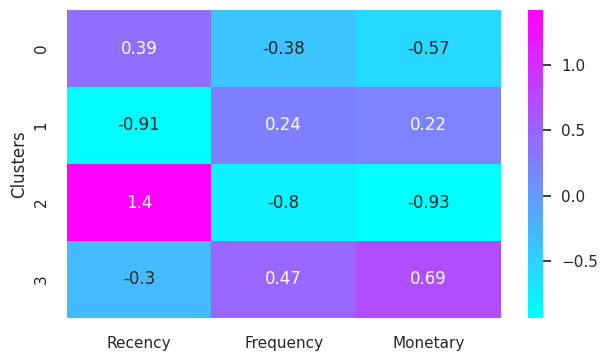

In [ ]:
plt.figure(figsize = (7,4))
sns.heatmap(relative_importance,annot = True,cmap = 'cool')
plt.show()

The heatmap of the relative importance with regards to the metrics buttressess the findings from the snake plot.





**SUMMARY**

United States was the country with the most orders.

Chairs, phones and binders are the sub-categories with the most orders.

Technology recorded the highest percentage of sales and profits.

Office Supplies had the most orders.

Corporate segment was introduced in 2018.

Consumer segment had the highest number of customers over the years, while home office had the least.

Central Region recorded the highest sales amongst all the regions.

EMEA market recorded the highest profit in furniture and technology categories.

While APAC has the highest profit in furniture over the 4 years.

EMEA market recorded the highest sales in furniture and technology categories.

While APAC has the highest sales in furniture over the 4 years.

In December, 2021(Retention Rate):

The cohort month with highest retention rate(21.79%) is August(08-2021) .

The cohort month with lowest retention rate(14.24%) is September(08-2021).

Using Cohort Analysis(Manual Clustering), 10 clusters was derived.

Customers within the Cannot Lose Them group have 175 individuals(3.59%) and the highest average monetary value of $4949.53 .  

While customers within the Promising group have 92 individuals(1.89%) and the lowest average monetary value of $598.57 .

Using K-Means algorithm(Machine Learning), 4 clusters was derived.

Cluster 0 and 2 are the least active groups.

Cluster 1 and 3 are the most active groups.



**RECOMMENDATION**

For the inactive groups, the organisation can create strategies such as targeted email campaigns about offers and promotion and feedback surveys to encourage reengagement among customers within that group.

For the active groups, the organisation can create strategies such as personalized gifts and surprises, loyalty points or rewards and regular feedback surveys on services provided and what recommendations they make to improve customer service, to maintain and grow customer loyalty among customers within that group.